# William G. Moore & Son Inc. Imports Analysis

In [2]:
import pandas as pd
import re

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df = pd.read_csv('William G. Moore & Son Inc. imports.csv')

In [5]:
df.head()

,PRODUCT DESCRIPTION,IMPORTER,IMPORTER ENTITY,SHIPPER,ARRIVAL DATE,YEAR,GROSS WEIGHT (LB),GROSS WEIGHT (KG),FOREIGN PORT,US PORT,VESSEL NAME,COUNTRY OF ORIGIN,MARKS &AMP; NUMBERS,CONSIGNEE ADDRESS,SHIPPER ADDRESS,ZIP CODE,NO. OF CONTAINERS,CONTAINER NUMBER,CONTAINER TYPE,QUANTITY,QUANTITY UNIT,MEASUREMENT,MEASUREMENT UNIT,BILL OF LADING,HOUSE VS MASTER,MASTER B/L,VOYAGE NUMBER,SEAL,SHIP REGISTERED IN,IN-BOND ENTRY TYPE,CARRIER CODE,CARRIER NAME,CARRIER CITY,CARRIER STATE,CARRIER ZIP,CARRIER ADDRESS,NOTIFY PARTY,NOTIFY ADDRESS,PLACE OF RECEIPT
0,HARDWOOD PALLETS EKKI / AZOBE HARDWOOD SAWN TIMBE,WILLIAM G. MOORE AND SON INC.,WILLIAM G. MOORE & SON INC,HUPKES WIJMA B.V.,05/22/2025,2025,43232,19651,Rotterdam,"New York/Newark Area, Newark, New Jersey",CMA CGM FIDELIO,Netherlands,NO MARKS .,218 SCHANCK ROAD OF DELAWARE FREEHOLD NJ 07728 US,HAATLANDHAVEN 3 KAMPEN 8263 NL,7728,1,CMAU0577316,,12,PKG,0,,RSECUSNYC5040344,H,CMDURTM1514655,0LBJF,BS579463,MALTA,,RSEC,ROSE CONTAINERLINE INC,NEW YORK,NY,10001,259 WEST 30TH ST 12TH FL,WILLIAM G. MOORE AND SON INC.,218 SCHANCK ROAD OF DELAWARE,ROTTERDAM NETHERL
1,EKKI / AZOBE HARDWOOD SAWN TIMBER,WILLIAM G. MOORE AND SON INC.,WILLIAM G. MOORE & SON INC,HUPKES WIJMA B.V.,04/25/2025,2025,40942,18610,Rotterdam,"New York, New York",LEONIDIO,Netherlands,NO MARKS,218 SCHANCK ROAD OF DELAWARE FREEHOLD NJ 07728 US,HAATLANDHAVEN 3 KAMPEN 8263 NL,7728,1,BMOU1270960,2210,9,PKG,0,,RSECUSNYC5030316,H,HLCURTM250312790,512W,9465 BS579465,MALTA,,RSEC,ROSE CONTAINERLINE INC,NEW YORK,NY,10001,259 WEST 30TH ST 12TH FL,WILLIAM G. MOORE AND SON INC.,218 SCHANCK ROAD OF DELAWARE,ROTTERDAM NETHERL
2,ROUGH SAWN GREENHEART LUMBER - 7104BM ALL DUNN...,WILLIAM G MOORE & SON INC,WILLIAM G. MOORE & SON INC,VARIETY WOODS & GREENHEART LTD,04/21/2025,2025,54520,24782,Cartagena,"New York/Newark Area, Newark, New Jersey",ZIM CORAL,Colombia,WGM 9541 P.O.G/ WAXED ENDS,"OF DELAWARE 218 SCHANCK ROAD, PO BOX 6309 FREE...","99 LALUNI STREET, QUEENSTOWN GEORGETOWN GUYANA...",,1,ZCSU7221791,4500,33,PCS,592,CF,ZIMUGTG0020335,,,6W,CETO380613 A4231559851,HONG KONG,,ZIMU,ZIM ISRAEL NAVIGATION CO LTD,HAIFA,,,,WILLIAM G MOORE & SON INC,"OF DELAWARE 218 SCHANCK ROAD, PO BOX 6309 FREE...",GEORGETOWN - GUYA
3,EKKI/AZOBE HARDWOOD SAWN TIMBER,WILLIAM G. MOORE AND SON INC.,WILLIAM G. MOORE & SON INC,HUPKES WIJMA B.V.,04/07/2025,2025,42330,19241,Rotterdam,"New York/Newark Area, Newark, New Jersey",APL LE HAVRE,Netherlands,NO MARKS,218 SCHANCK ROAD OF DELAWARE FREEHOLD NJ 07728 US,HAATLANDHAVEN 3 KAMPEN 8263 NL,7728,1,TGBU4082342,45G1,10,PKG,0,,RSECUSNYC5030228,H,COSU6411754720,0LBJ7,BS579467,SINGAPORE,,RSEC,ROSE CONTAINERLINE INC,NEW YORK,NY,10001,259 WEST 30TH ST 12TH FL,WILLIAM G. MOORE AND SON INC.,218 SCHANCK ROAD OF DELAWARE,ROTTERDAM NETHERL
4,ROUGH SAWN GREENHEART LUMBER - 7104BM ALL DUNN...,WILLIAM G MOORE & SON INC,WILLIAM G. MOORE & SON INC,VARIETY WOODS & GREENHEART LTD,03/31/2025,2025,54784,24902,Cartagena,"New York/Newark Area, Newark, New Jersey",ZIM ARIES,Colombia,WGM 9541 P.O.G/ WAXED ENDS,"OF DELAWARE 218 SCHANCK ROAD, PO BOX 6309 FREE...","99 LALUNI STREET, QUEENSTOWN GEORGETOWN GUYANA...",,1,ZCSU7090433,4500,37,PCS,592,CF,ZIMUGTG0020254,,,5W,CETO194164 A4231548444,LIBERIA,,ZIMU,ZIM ISRAEL NAVIGATION CO LTD,HAIFA,,,,WILLIAM G MOORE & SON INC,"OF DELAWARE 218 SCHANCK ROAD, PO BOX 6309 FREE...",GEORGETOWN - GUYA


In [6]:
df['SHIPPER'].value_counts()

SHIPPER
VARIETY WOODS & GREENHEART LIMITED    162
VARIETY WOODS & GREENHEART LTD         40
DURABLE WOOD PRODUCTS ENT.             38
WIJMA KAMPEN B.V.                      35
GS FOREST RESOURCES INC.               35
HUPKES WIJMA B.V.                      24
VARIETY WOODS & GREENHEART, INC.       23
WIJMA KAMPEN B.V                       12
DURABLE WOOD PRODUCTS ENTERPRISES      10
MCVANTAGE OF GUYANA INC                 6
GS FOREST RESOURCES                     6
TOOLSIE PERSAUD LIMITED                 5
G S FOREST RESOURCES INC                4
VARIETY WOODS & GREENHEART LIMITE       3
HOLLAND FREIGHT BRIDGE BV               3
REGINALD MANBODH T/A GS FOREST          3
COMPAGNIE FORESTIERE DE KRIBI SA        3
REGINALD MANBODH T/A G S FOREST         3
SDV-CAMEROUN                            3
G S FOREST RESOURCES                    3
SDV CAMEROUN                            2
REGINALD MANBODH T/A                    2
-NOT AVAILABLE-                         2
TIMBER WOOD PRODUCTS INC  

In [7]:
# Step 1: Normalize text (lowercase, remove punctuation, strip spaces)
def normalize(name):
    name = name.upper()
    name = re.sub(r'[.,\-\/]', '', name)
    name = re.sub(r'\s+', ' ', name)
    name = name.strip()
    return name

In [8]:
df['SHIPPER_CLEANED'] = df['SHIPPER'].apply(normalize)

In [9]:
# Step 2: Define a mapping of normalized names to unified names
name_map = {
    # Variety Woods & Greenheart
    'VARIETY WOODS & GREENHEART LIMITED': 'Variety Woods & Greenheart',
    'VARIETY WOODS & GREENHEART LTD': 'Variety Woods & Greenheart',
    'VARIETY WOODS & GREENHEART INC': 'Variety Woods & Greenheart',
    'VARIETY WOODS & GREENHEART LIMITE': 'Variety Woods & Greenheart',
    'VARIETY WOODS GREENHEART LTD': 'Variety Woods & Greenheart',
    'VARIETY WOODS & GREENHEART LTD': 'Variety Woods & Greenheart',
    
    # Durable Wood Products
    'DURABLE WOOD PRODUCTS ENT': 'Durable Wood Products Enterprises',
    'DURABLE WOOD PRODUCTS ENTERPRISES': 'Durable Wood Products Enterprises',
    'DURABLE WOOD PRODUCTS ENTERPRISE': 'Durable Wood Products Enterprises',

    # Wijma Kampen
    'WIJMA KAMPEN BV': 'Wijma Kampen B.V.',
    'WIJMA KAMPEN BV': 'Wijma Kampen B.V.',
    'WIJMA KAMPENB.V.': 'Wijma Kampen B.V.',
    'WIJMA KAMPEN B.V': 'Wijma Kampen B.V.',
    'WIJMA KAMPEN B.V.': 'Wijma Kampen B.V.',
    'WIJMA KAMPENBV': 'Wijma Kampen B.V.',

    # Hupkes Wijma
    'HUPKES WIJMA BV': 'Hupkes Wijma B.V.',
    'HUPKES WIJMA B.V.': 'Hupkes Wijma B.V.',
    'HUPKES WIJMA B,V': 'Hupkes Wijma B.V.',

    # GS Forest Resources
    'GS FOREST RESOURCES': 'GS Forest Resources',
    'GS FOREST RESOURCES INC': 'GS Forest Resources',
    'G S FOREST RESOURCES': 'GS Forest Resources',
    'G S FOREST RESOURCES INC': 'GS Forest Resources',

    # Reginald Manbodh variants
    'REGINALD MANBODH T/A GS FOREST': 'Reginald Manbodh T/A Gs Forest',
    'REGINALD MANBODH T/A G S FOREST': 'Reginald Manbodh T/A Gs Forest',
    'REGINALD MANBODH T/A G.S FOREST': 'Reginald Manbodh T/A Gs Forest',
    'REGINALD MANBODH T/A': 'Reginald Manbodh T/A Gs Forest',
    'REGINALD MANBODH TA': 'Reginald Manbodh T/A Gs Forest',
    'REGINALD MANBODH TA GS FOREST': 'Reginald Manbodh T/A Gs Forest',
    'REGINALD MANBODH TA G S FOREST': 'Reginald Manbodh T/A Gs Forest',

    # SDV Cameroun variants
    'SDV CAMEROUN': 'SDV Cameroun',
    'SDV-CAMEROUN': 'SDV Cameroun',
    'SDV - CAMEROON': 'SDV Cameroun',
    'SDV-CAMERRON': 'SDV Cameroun',
    'SDVCAMEROUN': 'SDV Cameroun',
    'SDVCAMERRON': 'SDV Cameroun',
    'SDV CAMEROON': 'SDV Cameroun',

    # # Others
     'TOOLSIE PERSAUD LIMITED': 'Toolsie Persaud Limited/Interior Forest Industrie',
     'MCVANTAGE OF GUYANA INC': 'McVantage of Guyana',
     'HOLLAND FREIGHT BRIDGE BV': 'Holland Freight Bridge B.V.',
     'HOLLAND FREIGHTBRIDGE BV': 'Holland Freight Bridge B.V.',
     'COMPAGNIE FORESTIERE DE KRIBI SA': 'Compagnie Forestière de Kribi SA',
     'COMPAGNIE FORESTIERE DE KRIBI': 'Compagnie Forestière de Kribi SA',
     'TIMBER WOOD PRODUCTS INC': 'Timber Wood Products',
     'GETMA CAMEROUN/DOUALA': 'Getma Cameroun/Douala',
     'INTERIOR FOREST INDUSTRIES LTD': 'Toolsie Persaud Limited/Interior Forest Industries',
     'INTERIOR FOREST INDUSTRIES LTD.': 'Toolsie Persaud Limited/Interior Forest Industries',
     'TRADELINC': 'Trade-Linc',
     'TRADE-LINC': 'Trade-Linc',
     'BARAKAT TIMBERS & TRADING CO LTD': 'Barakat Timbers & Trading Co.',
     'RAFEEK KHAN TA': 'Rafeek Khan T A Durable Wood Products Enterprises',
     'NOT AVAILABLE': 'Not Available',
    'GETMA CAMEROUNDOUALA': 'Getma Cameroun Douala'
}

In [10]:
# Step 3: Map normalized names to unified names
df['SHIPPER_CLEANED'] = df['SHIPPER_CLEANED'].replace(name_map)

In [11]:
# Step 4: Group and sum by cleaned name
df.groupby('SHIPPER_CLEANED').size().reset_index(name='Total Count').sort_values(by='Total Count', ascending=False)

,SHIPPER_CLEANED,Total Count
16,Variety Woods & Greenheart,230
17,Wijma Kampen B.V.,49
2,Durable Wood Products Enterprises,49
3,GS Forest Resources,48
6,Hupkes Wijma B.V.,25
10,Reginald Manbodh T/A Gs Forest,9
11,SDV Cameroun,7
7,McVantage of Guyana,6
13,Toolsie Persaud Limited/Interior Forest Industrie,5
5,Holland Freight Bridge B.V.,4


In [12]:
company_to_country = {
    'Getma Cameroun Douala': 'Cameroon',
    'SDV Cameroun': 'Cameroon',
    'Compagnie Forestière de Kribi SA': 'Cameroon',
    'Reginald Manbodh T/A Gs Forest': 'Guyana',
    'Variety Woods & Greenheart': 'Guyana',
    'Trade-Linc': 'Guyana',
    'Timber Wood Products': 'Guyana',
    'Wijma Kampen B.V.': 'Netherlands',
    'McVantage of Guyana': 'Guyana',
    'Barakat Timbers & Trading Co.': 'Guyana',
    'Hupkes Wijma B.V.': 'Netherlands',
    'GS Forest Resources': 'Guyana',
    'Holland Freight Bridge B.V.': 'Netherlands',
    'Toolsie Persaud Limited/Interior Forest Industries': 'Guyana',
    'Durable Wood Products Enterprises': 'Guyana',
    'Rafeek Khan T A Durable Wood Products Enterprises': 'Guyana'
}

In [13]:
df['SHIPPER_COUNTRY'] = df['SHIPPER_CLEANED'].map(company_to_country)

In [14]:
df

,PRODUCT DESCRIPTION,IMPORTER,IMPORTER ENTITY,SHIPPER,ARRIVAL DATE,YEAR,GROSS WEIGHT (LB),GROSS WEIGHT (KG),FOREIGN PORT,US PORT,VESSEL NAME,COUNTRY OF ORIGIN,MARKS &AMP; NUMBERS,CONSIGNEE ADDRESS,SHIPPER ADDRESS,ZIP CODE,NO. OF CONTAINERS,CONTAINER NUMBER,CONTAINER TYPE,QUANTITY,QUANTITY UNIT,MEASUREMENT,MEASUREMENT UNIT,BILL OF LADING,HOUSE VS MASTER,MASTER B/L,VOYAGE NUMBER,SEAL,SHIP REGISTERED IN,IN-BOND ENTRY TYPE,CARRIER CODE,CARRIER NAME,CARRIER CITY,CARRIER STATE,CARRIER ZIP,CARRIER ADDRESS,NOTIFY PARTY,NOTIFY ADDRESS,PLACE OF RECEIPT,SHIPPER_CLEANED,SHIPPER_COUNTRY
0,HARDWOOD PALLETS EKKI / AZOBE HARDWOOD SAWN TIMBE,WILLIAM G. MOORE AND SON INC.,WILLIAM G. MOORE & SON INC,HUPKES WIJMA B.V.,05/22/2025,2025,43232,19651,Rotterdam,"New York/Newark Area, Newark, New Jersey",CMA CGM FIDELIO,Netherlands,NO MARKS .,218 SCHANCK ROAD OF DELAWARE FREEHOLD NJ 07728 US,HAATLANDHAVEN 3 KAMPEN 8263 NL,7728,1,CMAU0577316,,12,PKG,0,,RSECUSNYC5040344,H,CMDURTM1514655,0LBJF,BS579463,MALTA,,RSEC,ROSE CONTAINERLINE INC,NEW YORK,NY,10001,259 WEST 30TH ST 12TH FL,WILLIAM G. MOORE AND SON INC.,218 SCHANCK ROAD OF DELAWARE,ROTTERDAM NETHERL,Hupkes Wijma B.V.,Netherlands
1,EKKI / AZOBE HARDWOOD SAWN TIMBER,WILLIAM G. MOORE AND SON INC.,WILLIAM G. MOORE & SON INC,HUPKES WIJMA B.V.,04/25/2025,2025,40942,18610,Rotterdam,"New York, New York",LEONIDIO,Netherlands,NO MARKS,218 SCHANCK ROAD OF DELAWARE FREEHOLD NJ 07728 US,HAATLANDHAVEN 3 KAMPEN 8263 NL,7728,1,BMOU1270960,2210,9,PKG,0,,RSECUSNYC5030316,H,HLCURTM250312790,512W,9465 BS579465,MALTA,,RSEC,ROSE CONTAINERLINE INC,NEW YORK,NY,10001,259 WEST 30TH ST 12TH FL,WILLIAM G. MOORE AND SON INC.,218 SCHANCK ROAD OF DELAWARE,ROTTERDAM NETHERL,Hupkes Wijma B.V.,Netherlands
2,ROUGH SAWN GREENHEART LUMBER - 7104BM ALL DUNN...,WILLIAM G MOORE & SON INC,WILLIAM G. MOORE & SON INC,VARIETY WOODS & GREENHEART LTD,04/21/2025,2025,54520,24782,Cartagena,"New York/Newark Area, Newark, New Jersey",ZIM CORAL,Colombia,WGM 9541 P.O.G/ WAXED ENDS,"OF DELAWARE 218 SCHANCK ROAD, PO BOX 6309 FREE...","99 LALUNI STREET, QUEENSTOWN GEORGETOWN GUYANA...",,1,ZCSU7221791,4500,33,PCS,592,CF,ZIMUGTG0020335,,,6W,CETO380613 A4231559851,HONG KONG,,ZIMU,ZIM ISRAEL NAVIGATION CO LTD,HAIFA,,,,WILLIAM G MOORE & SON INC,"OF DELAWARE 218 SCHANCK ROAD, PO BOX 6309 FREE...",GEORGETOWN - GUYA,Variety Woods & Greenheart,Guyana
3,EKKI/AZOBE HARDWOOD SAWN TIMBER,WILLIAM G. MOORE AND SON INC.,WILLIAM G. MOORE & SON INC,HUPKES WIJMA B.V.,04/07/2025,2025,42330,19241,Rotterdam,"New York/Newark Area, Newark, New Jersey",APL LE HAVRE,Netherlands,NO MARKS,218 SCHANCK ROAD OF DELAWARE FREEHOLD NJ 07728 US,HAATLANDHAVEN 3 KAMPEN 8263 NL,7728,1,TGBU4082342,45G1,10,PKG,0,,RSECUSNYC5030228,H,COSU6411754720,0LBJ7,BS579467,SINGAPORE,,RSEC,ROSE CONTAINERLINE INC,NEW YORK,NY,10001,259 WEST 30TH ST 12TH FL,WILLIAM G. MOORE AND SON INC.,218 SCHANCK ROAD OF DELAWARE,ROTTERDAM NETHERL,Hupkes Wijma B.V.,Netherlands
4,ROUGH SAWN GREENHEART LUMBER - 7104BM ALL DUNN...,WILLIAM G MOORE & SON INC,WILLIAM G. MOORE & SON INC,VARIETY WOODS & GREENHEART LTD,03/31/2025,2025,54784,24902,Cartagena,"New York/Newark Area, Newark, New Jersey",ZIM ARIES,Colombia,WGM 9541 P.O.G/ WAXED ENDS,"OF DELAWARE 218 SCHANCK ROAD, PO BOX 6309 FREE...","99 LALUNI STREET, QUEENSTOWN GEORGETOWN GUYANA...",,1,ZCSU7090433,4500,37,PCS,592,CF,ZIMUGTG0020254,,,5W,CETO194164 A4231548444,LIBERIA,,ZIMU,ZIM ISRAEL NAVIGATION CO LTD,HAIFA,,,,WILLIAM G MOORE & SON INC,"OF DELAWARE 218 SCHANCK ROAD, PO BOX 6309 FREE...",GEORGETOWN - GUYA,Variety Woods & Greenheart,Guyana
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440,OF 171 PCS AZOBE CTS 27-280 / 27-281 : OT 1942...,MOORE WILLIAM G & SON INC,,SDV - CAMEROON,08/05/2007,2007,57061,25937,Bonaberi,"Savannah, Georgia",SAFMARINE CAVALLA,Cameroon,G W Z,4459 AMBOY RDSTE 4STATEN ISLAND NY 10312718-22...,FOR ACCOUNT OF WIJMA P.O BOX1616 DOUAL

In [15]:
df['ekki'] = df['PRODUCT DESCRIPTION'].str.contains('EKKI|AZOBE', regex=True, case=False, na=False)

In [16]:
df['greenheart'] = df['PRODUCT DESCRIPTION'].str.contains('GREENHEART', regex=True, case=False, na=False)

In [17]:
df['darina'] = df['PRODUCT DESCRIPTION'].str.contains('DARINA|Demerara Oak', regex=True, case=False, na=False)

In [18]:
df['tatabu'] = df['PRODUCT DESCRIPTION'].str.contains('tatabu', regex=True, case=False, na=False)

In [19]:
df['shibadan'] = df['PRODUCT DESCRIPTION'].str.contains('shibadan', regex=True, case=False, na=False)

In [20]:
df['tauroniro'] = df['PRODUCT DESCRIPTION'].str.contains('tauroniro', regex=True, case=False, na=False)

In [21]:
df['garlicwood'] = df['PRODUCT DESCRIPTION'].str.contains('Garlicwood|Guyana White Oak', regex=True, case=False, na=False)

In [22]:
df['locust'] = df['PRODUCT DESCRIPTION'].str.contains('locust|Jatoba', regex=True, case=False, na=False)

In [23]:
df['bulletwood'] = df['PRODUCT DESCRIPTION'].str.contains('Bulletwood', regex=True, case=False, na=False)

In [24]:
df['kabukalli'] = df['PRODUCT DESCRIPTION'].str.contains('kabukalli', regex=True, case=False, na=False)

In [25]:
df['wamara'] = df['PRODUCT DESCRIPTION'].str.contains('wamaradan|wamara|wamaradang', regex=True, case=False, na=False)

In [26]:
df['cow wood'] = df['PRODUCT DESCRIPTION'].str.contains('cow wood|cow tree', regex=True, case=False, na=False)

In [27]:
df['mora'] = df['PRODUCT DESCRIPTION'].str.contains('mora', regex=True, case=False, na=False)

In [28]:
df['bukea'] = df['PRODUCT DESCRIPTION'].str.contains('bukea', regex=True, case=False, na=False)

In [29]:
df['burada'] = df['PRODUCT DESCRIPTION'].str.contains('burada', regex=True, case=False, na=False)

In [30]:
df['eucalyptus cloeziana'] = df['PRODUCT DESCRIPTION'].str.contains('eucalyptus|EUCALUPTUS', regex=True, case=False, na=False)

In [31]:
df['tali'] = df['PRODUCT DESCRIPTION'].str.contains('tali', regex=True, case=False, na=False)

In [32]:
df['piles'] = df['PRODUCT DESCRIPTION'].str.contains('piles|pile', regex=True, case=False, na=False)

In [33]:
#df.head(50)

In [34]:
df['darina'].value_counts()

darina
False    435
True      10
Name: count, dtype: int64

In [35]:
df['tatabu'].value_counts()

tatabu
False    436
True       9
Name: count, dtype: int64

In [36]:
df['shibadan'].value_counts()

shibadan
False    436
True       9
Name: count, dtype: int64

In [37]:
df['tauroniro'].value_counts()

tauroniro
False    442
True       3
Name: count, dtype: int64

In [38]:
df['garlicwood'].value_counts()

garlicwood
False    444
True       1
Name: count, dtype: int64

In [39]:
df['locust'].value_counts()

locust
False    444
True       1
Name: count, dtype: int64

In [40]:
df['bulletwood'].value_counts()

bulletwood
False    443
True       2
Name: count, dtype: int64

In [41]:
df['kabukalli'].value_counts()

kabukalli
False    429
True      16
Name: count, dtype: int64

In [42]:
df['wamara'].value_counts()

wamara
False    436
True       9
Name: count, dtype: int64

In [43]:
df['cow wood'].value_counts()

cow wood
False    443
True       2
Name: count, dtype: int64

In [44]:
df['mora'].value_counts()

mora
False    439
True       6
Name: count, dtype: int64

In [45]:
df['bukea'].value_counts()

bukea
False    444
True       1
Name: count, dtype: int64

In [46]:
df['burada'].value_counts()

burada
False    444
True       1
Name: count, dtype: int64

In [47]:
df['eucalyptus cloeziana'].value_counts()

eucalyptus cloeziana
False    444
True       1
Name: count, dtype: int64

In [48]:
df['tali'].value_counts()

tali
False    444
True       1
Name: count, dtype: int64

In [49]:
df['piles'].value_counts()

piles
False    231
True     214
Name: count, dtype: int64

In [50]:
df.to_csv('william_g_moore_imports_cleaned.csv', index=False)

In [51]:
df.head()

,PRODUCT DESCRIPTION,IMPORTER,IMPORTER ENTITY,SHIPPER,ARRIVAL DATE,YEAR,GROSS WEIGHT (LB),GROSS WEIGHT (KG),FOREIGN PORT,US PORT,VESSEL NAME,COUNTRY OF ORIGIN,MARKS &AMP; NUMBERS,CONSIGNEE ADDRESS,SHIPPER ADDRESS,ZIP CODE,NO. OF CONTAINERS,CONTAINER NUMBER,CONTAINER TYPE,QUANTITY,QUANTITY UNIT,MEASUREMENT,MEASUREMENT UNIT,BILL OF LADING,HOUSE VS MASTER,MASTER B/L,VOYAGE NUMBER,SEAL,SHIP REGISTERED IN,IN-BOND ENTRY TYPE,CARRIER CODE,CARRIER NAME,CARRIER CITY,CARRIER STATE,CARRIER ZIP,CARRIER ADDRESS,NOTIFY PARTY,NOTIFY ADDRESS,PLACE OF RECEIPT,SHIPPER_CLEANED,SHIPPER_COUNTRY,ekki,greenheart,darina,tatabu,shibadan,tauroniro,garlicwood,locust,bulletwood,kabukalli,wamara,cow wood,mora,bukea,burada,eucalyptus cloeziana,tali,piles
0,HARDWOOD PALLETS EKKI / AZOBE HARDWOOD SAWN TIMBE,WILLIAM G. MOORE AND SON INC.,WILLIAM G. MOORE & SON INC,HUPKES WIJMA B.V.,05/22/2025,2025,43232,19651,Rotterdam,"New York/Newark Area, Newark, New Jersey",CMA CGM FIDELIO,Netherlands,NO MARKS .,218 SCHANCK ROAD OF DELAWARE FREEHOLD NJ 07728 US,HAATLANDHAVEN 3 KAMPEN 8263 NL,7728,1,CMAU0577316,,12,PKG,0,,RSECUSNYC5040344,H,CMDURTM1514655,0LBJF,BS579463,MALTA,,RSEC,ROSE CONTAINERLINE INC,NEW YORK,NY,10001,259 WEST 30TH ST 12TH FL,WILLIAM G. MOORE AND SON INC.,218 SCHANCK ROAD OF DELAWARE,ROTTERDAM NETHERL,Hupkes Wijma B.V.,Netherlands,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,EKKI / AZOBE HARDWOOD SAWN TIMBER,WILLIAM G. MOORE AND SON INC.,WILLIAM G. MOORE & SON INC,HUPKES WIJMA B.V.,04/25/2025,2025,40942,18610,Rotterdam,"New York, New York",LEONIDIO,Netherlands,NO MARKS,218 SCHANCK ROAD OF DELAWARE FREEHOLD NJ 07728 US,HAATLANDHAVEN 3 KAMPEN 8263 NL,7728,1,BMOU1270960,2210,9,PKG,0,,RSECUSNYC5030316,H,HLCURTM250312790,512W,9465 BS579465,MALTA,,RSEC,ROSE CONTAINERLINE INC,NEW YORK,NY,10001,259 WEST 30TH ST 12TH FL,WILLIAM G. MOORE AND SON INC.,218 SCHANCK ROAD OF DELAWARE,ROTTERDAM NETHERL,Hupkes Wijma B.V.,Netherlands,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,ROUGH SAWN GREENHEART LUMBER - 7104BM ALL DUNN...,WILLIAM G MOORE & SON INC,WILLIAM G. MOORE & SON INC,VARIETY WOODS & GREENHEART LTD,04/21/2025,2025,54520,24782,Cartagena,"New York/Newark Area, Newark, New Jersey",ZIM CORAL,Colombia,WGM 9541 P.O.G/ WAXED ENDS,"OF DELAWARE 218 SCHANCK ROAD, PO BOX 6309 FREE...","99 LALUNI STREET, QUEENSTOWN GEORGETOWN GUYANA...",,1,ZCSU7221791,4500,33,PCS,592,CF,ZIMUGTG0020335,,,6W,CETO380613 A4231559851,HONG KONG,,ZIMU,ZIM ISRAEL NAVIGATION CO LTD,HAIFA,,,,WILLIAM G MOORE & SON INC,"OF DELAWARE 218 SCHANCK ROAD, PO BOX 6309 FREE...",GEORGETOWN - GUYA,Variety Woods & Greenheart,Guyana,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,EKKI/AZOBE HARDWOOD SAWN TIMBER,WILLIAM G. MOORE AND SON INC.,WILLIAM G. MOORE & SON INC,HUPKES WIJMA B.V.,04/07/2025,2025,42330,19241,Rotterdam,"New York/Newark Area, Newark, New Jersey",APL LE HAVRE,Netherlands,NO MARKS,218 SCHANCK ROAD OF DELAWARE FREEHOLD NJ 07728 US,HAATLANDHAVEN 3 KAMPEN 8263 NL,7728,1,TGBU4082342,45G1,10,PKG,0,,RSECUSNYC5030228,H,COSU6411754720,0LBJ7,BS579467,SINGAPORE,,RSEC,ROSE CONTAINERLINE INC,NEW YORK,NY,10001,259 WEST 30TH ST 12TH FL,WILLIAM G. MOORE AND SON INC.,218 SCHANCK ROAD OF DELAWARE,ROTTERDAM NETHERL,Hupkes Wijma B.V.,Netherlands,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,ROUGH SAWN GREENHEART LUMBER - 7104BM ALL DUNN...,WILLIAM G MOORE & SON INC,WILLIAM G. MOORE & SON INC,VARIETY WOODS & GREENHEART LTD,03/31/2025,2025,54784,24902,Cartagena,"New York/Newark Area, Newark, New Jersey",ZIM ARIES,Colombia,WGM 9541 P.O.G/ WAXED ENDS,"OF DELAWARE 218 SCHANCK ROAD, PO BOX 6309 FREE...","99 LALUNI STREET, QUEENSTOWN GEORGETOWN GUYANA...",,1,ZCSU7090433,4500,37,PCS,592,CF,ZIMUGTG0020254,,,5W,CETO194164 A4231548444,LIBERIA,,ZIMU,ZIM ISRAEL NAVIGATION CO LTD

## Average weight of each shipment

In [52]:
df.groupby('SHIPPER_CLEANED')['GROSS WEIGHT (KG)'].mean().reset_index().sort_values(by='GROSS WEIGHT (KG)', ascending=False)

,SHIPPER_CLEANED,GROSS WEIGHT (KG)
16,Variety Woods & Greenheart,51420.300000
11,SDV Cameroun,44215.857143
17,Wijma Kampen B.V.,36610.469388
4,Getma Cameroun Douala,35472.000000
7,McVantage of Guyana,35100.166667
8,Not Available,29617.000000
1,Compagnie Forestière de Kribi SA,27777.250000
10,Reginald Manbodh T/A Gs Forest,26769.222222
15,Trade-Linc,25393.000000
12,Timber Wood Products,25342.000000


### Variety Woods & Greenheart has the highest weighted shipments by mean, followed by SDV Cameroun and then Wijma Kampen B.V.

In [53]:
df.groupby('SHIPPER_CLEANED')['GROSS WEIGHT (KG)'].median().reset_index().sort_values(by='GROSS WEIGHT (KG)', ascending=False)

,SHIPPER_CLEANED,GROSS WEIGHT (KG)
4,Getma Cameroun Douala,35472.0
8,Not Available,29617.0
11,SDV Cameroun,29575.0
1,Compagnie Forestière de Kribi SA,29084.0
10,Reginald Manbodh T/A Gs Forest,27267.0
16,Variety Woods & Greenheart,25894.0
15,Trade-Linc,25393.0
12,Timber Wood Products,25342.0
17,Wijma Kampen B.V.,23801.0
7,McVantage of Guyana,23494.5


### The medians are a lot closer together for most of the main companies, in the 20,000 kgs per shipment

In [54]:
avg_weight_per_year = df.groupby(['SHIPPER_CLEANED', 'YEAR'])['GROSS WEIGHT (KG)'].mean().reset_index().pivot(index='SHIPPER_CLEANED', columns='YEAR', values='GROSS WEIGHT (KG)') 

In [55]:
avg_weight_per_year

YEAR,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025
SHIPPER_CLEANED,,,,,,,,,,,,,,,,,,,
Barakat Timbers & Trading Co.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23008.000000,NaN,NaN,NaN,NaN,NaN
Compagnie Forestière de Kribi SA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13644.000000,32488.333333,NaN,NaN,NaN,NaN,NaN,NaN
Durable Wood Products Enterprises,NaN,NaN,NaN,NaN,NaN,15945.375,14760.769231,21204.062500,8218.333333,16515.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GS Forest Resources,NaN,NaN,NaN,16988.333333,NaN,18298.000,7570.000000,11060.555556,10245.250000,24795.333333,30560.333333,27667.875000,25034.000000,26251.333333,NaN,NaN,NaN,NaN,NaN
Getma Cameroun Douala,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35472.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Holland Freight Bridge B.V.,NaN,NaN,NaN,23006.000000,15469.00,NaN,6375.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hupkes Wijma B.V.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24653.0,29260.0,20729.3
McVantage of Guyana,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38705.200000,NaN,NaN,NaN,17075.000000,NaN,NaN,NaN,NaN,NaN
Not Available,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32027.0,27207.0


In [56]:
avg_weight_per_year.to_csv('william_g_moore_shipments_avg_weight_per_year.csv')

In [57]:
df.dtypes

PRODUCT DESCRIPTION     object
IMPORTER                object
IMPORTER ENTITY         object
SHIPPER                 object
ARRIVAL DATE            object
YEAR                     int64
GROSS WEIGHT (LB)        int64
GROSS WEIGHT (KG)        int64
FOREIGN PORT            object
US PORT                 object
VESSEL NAME             object
COUNTRY OF ORIGIN       object
MARKS &AMP; NUMBERS     object
CONSIGNEE ADDRESS       object
SHIPPER ADDRESS         object
ZIP CODE                object
NO. OF CONTAINERS        int64
CONTAINER NUMBER        object
CONTAINER TYPE          object
QUANTITY                 int64
QUANTITY UNIT           object
MEASUREMENT              int64
MEASUREMENT UNIT        object
BILL OF LADING          object
HOUSE VS MASTER         object
MASTER B/L              object
VOYAGE NUMBER           object
SEAL                    object
SHIP REGISTERED IN      object
IN-BOND ENTRY TYPE      object
CARRIER CODE            object
CARRIER NAME            object
CARRIER 

In [58]:
df.groupby('YEAR')['SHIPPER_COUNTRY'].value_counts()

YEAR  SHIPPER_COUNTRY
2007  Cameroon            7
      Netherlands         1
2008  Netherlands         2
2009  Guyana             31
      Netherlands        10
2010  Guyana             37
      Netherlands         4
2011  Guyana             27
      Netherlands         4
2012  Guyana             32
2013  Guyana             27
      Netherlands         3
2014  Guyana             30
      Cameroon            1
      Netherlands         1
2015  Guyana             15
      Netherlands         1
2016  Guyana             17
      Netherlands         4
2017  Guyana             16
      Netherlands         3
2018  Guyana             32
      Netherlands         6
      Cameroon            1
2019  Guyana             23
      Netherlands         4
      Cameroon            3
2020  Guyana             19
      Netherlands         3
2021  Guyana             18
      Netherlands         7
2022  Guyana              9
2023  Guyana             10
      Netherlands         5
2024  Netherlands        1

## Shipping countries per year

In [59]:
shipping_countries_per_year = df.pivot_table(
    index='YEAR',
    columns='SHIPPER_COUNTRY',
    values='SHIPPER_CLEANED',  # any column name works for counting rows
    aggfunc='size',
    fill_value=0
)

In [60]:
shipping_countries_per_year

SHIPPER_COUNTRY,Cameroon,Guyana,Netherlands
YEAR,,,
2007,7,0,1
2008,0,0,2
2009,0,31,10
2010,0,37,4
2011,0,27,4
2012,0,32,0
2013,0,27,3
2014,1,30,1
2015,0,15,1


<Axes: xlabel='YEAR'>

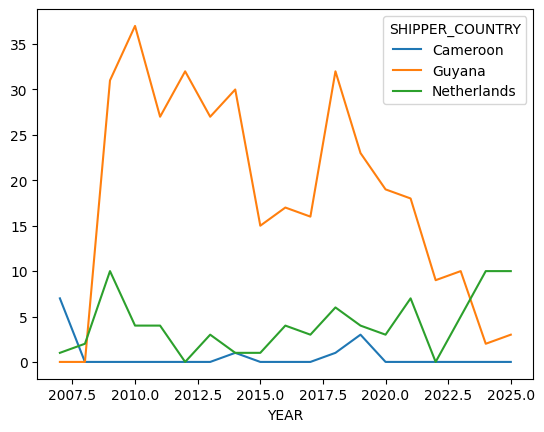

In [61]:
shipping_countries_per_year.plot()

### From a high in 2018, the number of shipments through Guyana have decreased starkly, as the number coming through the Netherlands have increased. Imports direct from Cameroon were mainly in 2007, with a few in 2014, 2018 and 2019

## Shipping countries per year for ekki wood

In [62]:
ekki_shipping_countries_per_year = df[df['ekki']].pivot_table(
    index='YEAR',
    columns='SHIPPER_COUNTRY',
    values='SHIPPER_CLEANED',  # any column works for counting rows
    aggfunc='size',
    fill_value=0
)

In [63]:
ekki_shipping_countries_per_year

SHIPPER_COUNTRY,Cameroon,Netherlands
YEAR,,
2007,7,0
2008,0,2
2009,0,10
2010,0,3
2011,0,4
2013,0,3
2014,1,1
2015,0,1
2016,0,4


<Axes: xlabel='YEAR'>

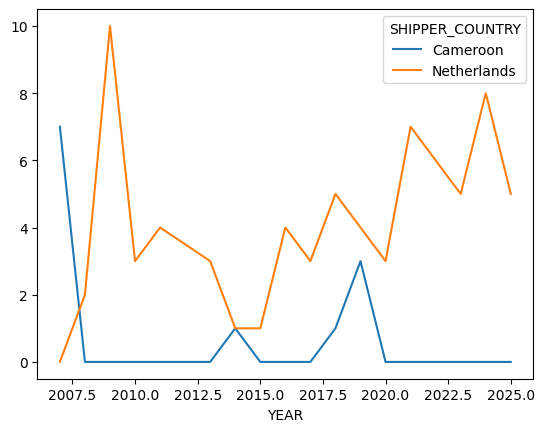

In [64]:
ekki_shipping_countries_per_year.plot()

### Ekki has also increasingly come through the Netherlands, especially since 2015

In [65]:
greenheart_shipping_countries_per_year = df[df['greenheart']].pivot_table(
    index='YEAR',
    columns='SHIPPER_COUNTRY',
    values='SHIPPER_CLEANED',  # any column works for counting rows
    aggfunc='size',
    fill_value=0
)

## Shipping countries per year for greenheart wood

In [66]:
greenheart_shipping_countries_per_year

SHIPPER_COUNTRY,Guyana
YEAR,
2009,30
2010,34
2011,26
2012,30
2013,22
2014,30
2015,14
2016,14
2017,14


<Axes: xlabel='YEAR'>

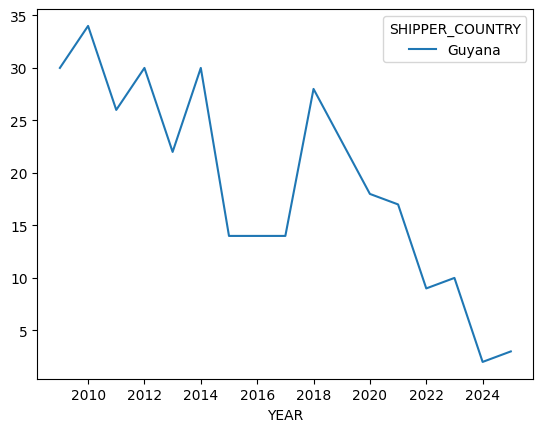

In [67]:
greenheart_shipping_countries_per_year.plot()

### Greenheart has been shipped solely through Guyana. This has decreased starkly since 2010

## Wood species shipments over the years

In [68]:
# List of boolean wood species columns
species_cols = [
    'ekki', 'greenheart', 'darina', 'tatabu', 'shibadan', 'tauroniro',
    'garlicwood', 'locust', 'bulletwood', 'kabukalli', 'wamara',
    'cow wood', 'mora', 'bukea', 'burada', 'eucalyptus cloeziana', 'tali'
]

In [69]:
# Create the pivot table: YEAR as index, species as columns, values = count of True values
species_per_year = df.groupby('YEAR')[species_cols].sum()

In [70]:
species_per_year

,ekki,greenheart,darina,tatabu,shibadan,tauroniro,garlicwood,locust,bulletwood,kabukalli,wamara,cow wood,mora,bukea,burada,eucalyptus cloeziana,tali
YEAR,,,,,,,,,,,,,,,,,
2007,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2008,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2009,10,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2010,3,34,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2011,4,26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2012,0,30,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0
2013,3,24,0,3,0,0,0,0,0,2,2,0,1,0,1,0,0
2014,2,32,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2015,1,14,2,1,1,0,0,0,0,1,0,1,0,0,0,0,0


In [71]:
import matplotlib.pyplot as plt

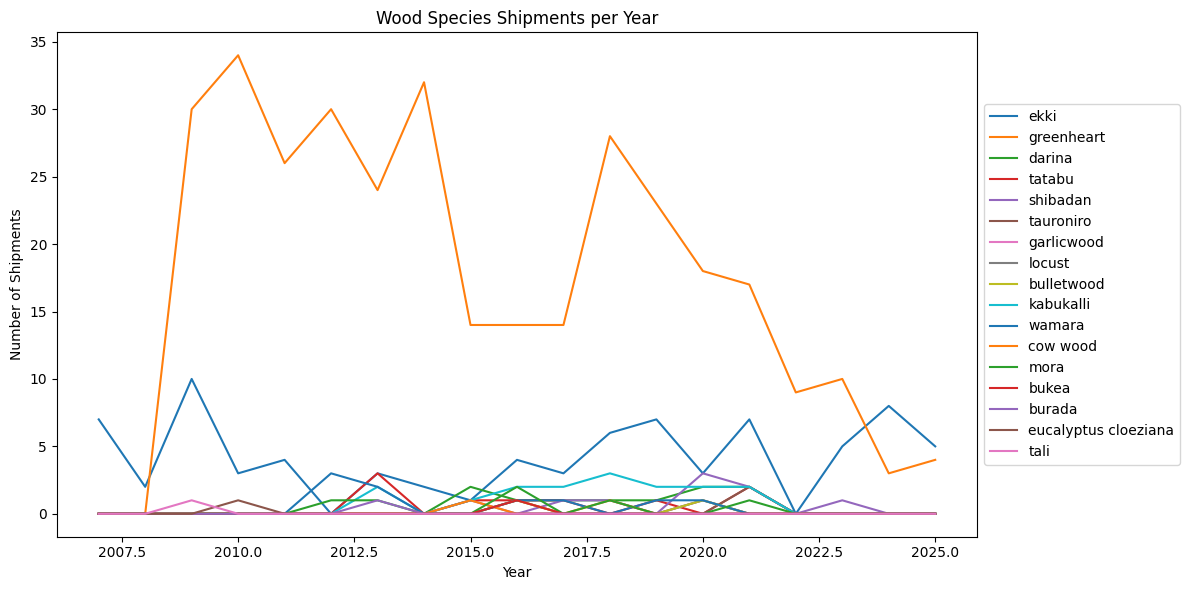

In [72]:
ax = species_per_year.plot(figsize=(12, 6))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title('Wood Species Shipments per Year')
plt.xlabel('Year')
plt.ylabel('Number of Shipments')
plt.tight_layout()
plt.show()

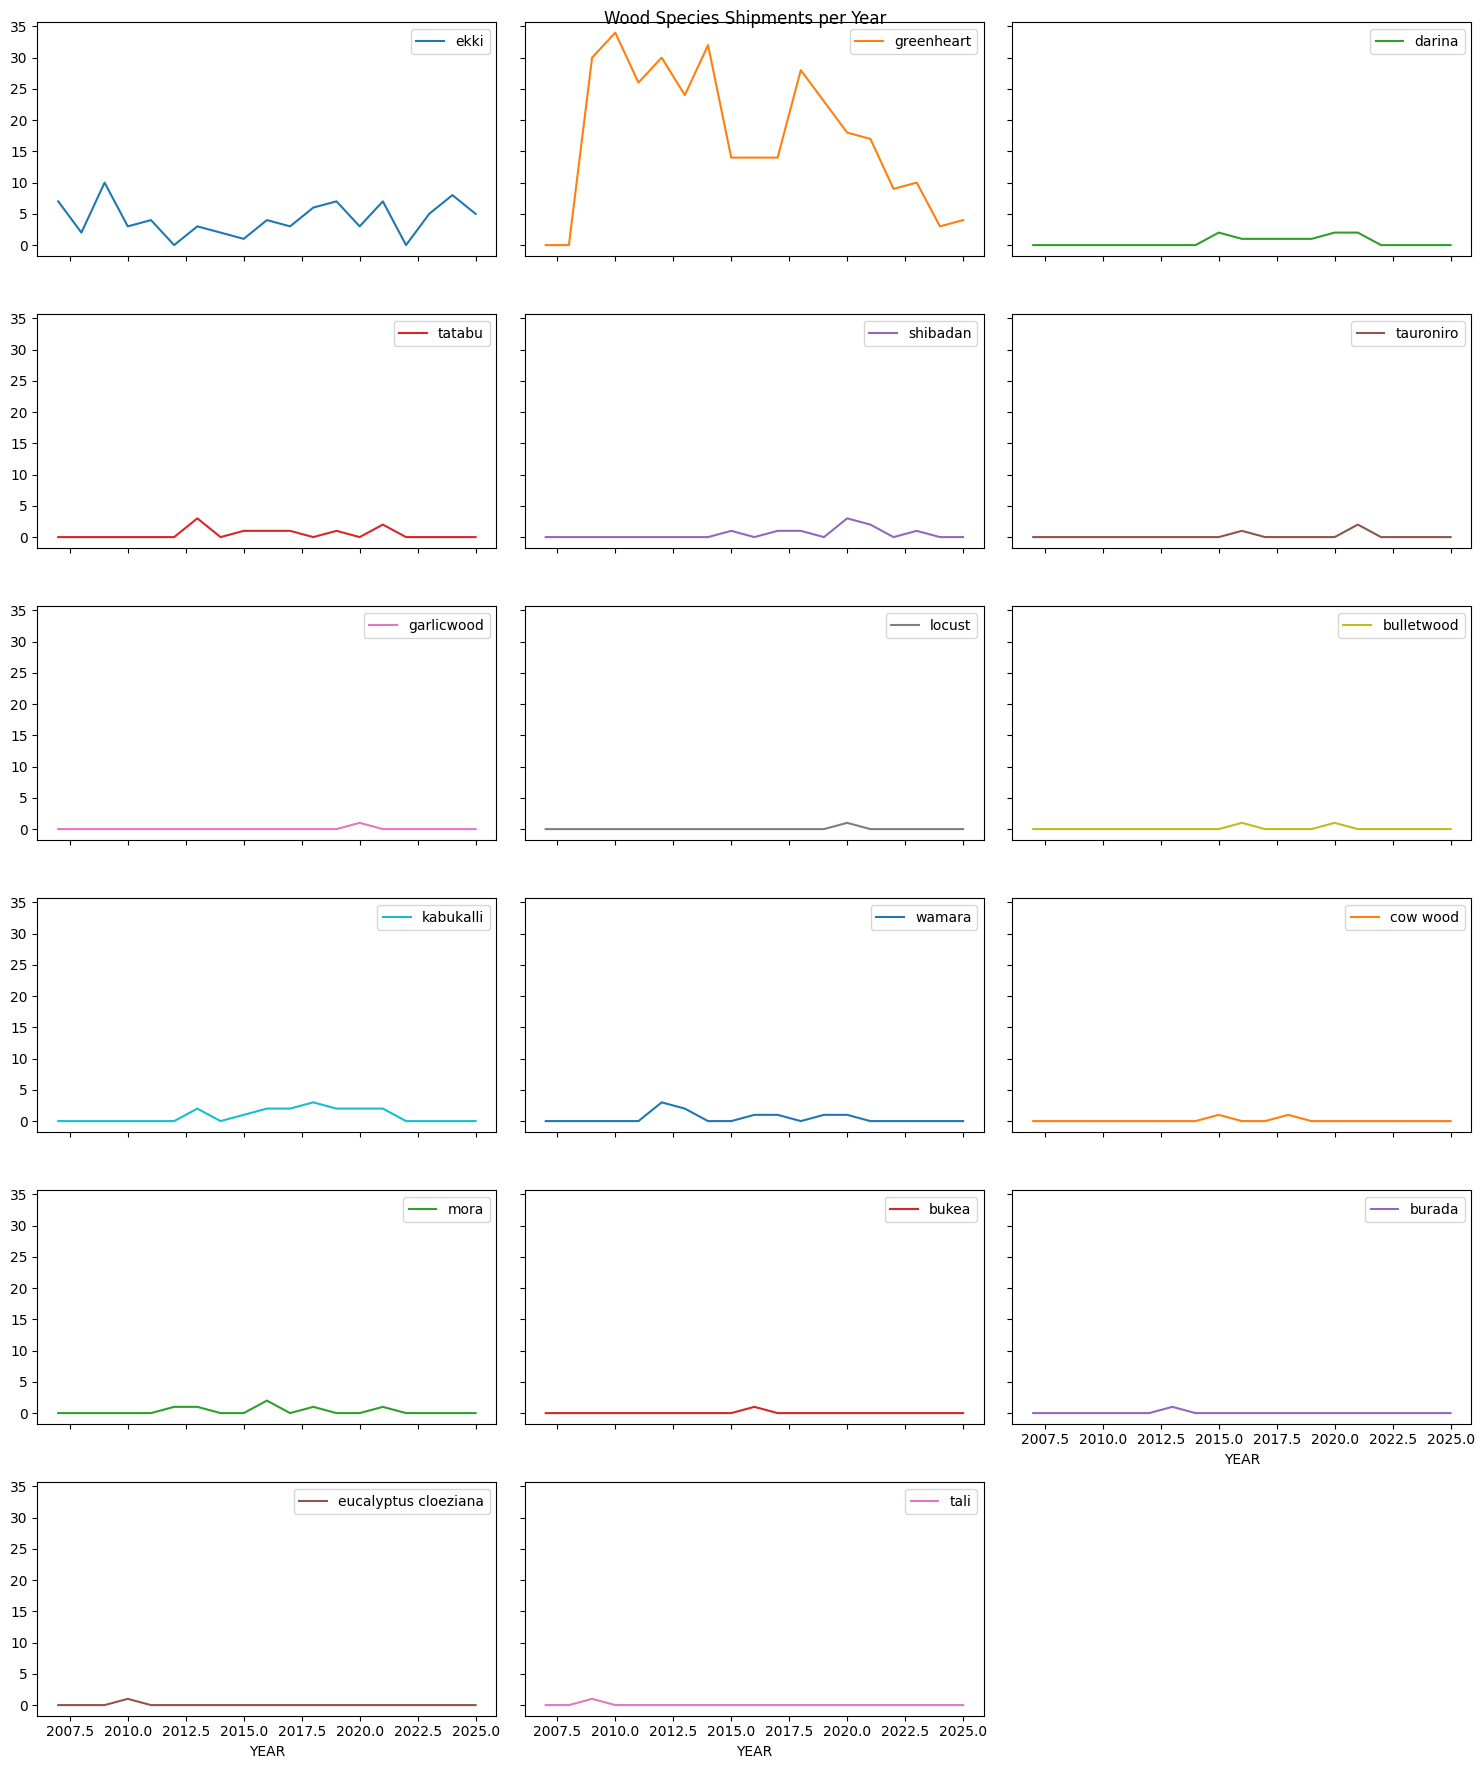

In [73]:
# Create subplots for each species
axes = species_per_year.plot(
    subplots=True,
    layout=(6, 3),  # adjust grid size to fit 17 species (e.g., 6 rows, 3 columns)
    figsize=(15, 18),
    sharex=True,
    sharey=True,
    title='Wood Species Shipments per Year'
)

# Adjust layout and spacing
plt.tight_layout()
plt.show()

### Greenheart imports have been decreasing, while ekki imports have remained more constant over the years. Other types are minimal, with a few increasing slightly in recent years.

In [74]:
df[df['piles'] == True].groupby('YEAR').size()

YEAR
2009    22
2010    29
2011    17
2012    15
2013    15
2014    24
2015    10
2016    10
2017     8
2018    14
2019    13
2020    10
2021    11
2022     7
2023     6
2024     2
2025     1
dtype: int64

## Imports of piles over the years

<Axes: xlabel='YEAR'>

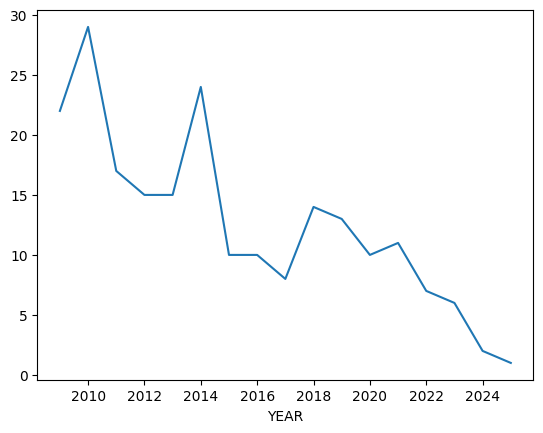

In [75]:
df[df['piles'] == True].groupby('YEAR').size().plot()

In [76]:
df[df['piles'] == True].groupby('YEAR')['GROSS WEIGHT (KG)'].sum()

YEAR
2009     933000
2010    1304460
2011     636530
2012    1096199
2013     204163
2014    1228727
2015     105681
2016    1344042
2017     237716
2018     665091
2019    1046521
2020     470787
2021     888904
2022     187731
2023     558875
2024      57420
2025      27207
Name: GROSS WEIGHT (KG), dtype: int64

<Axes: xlabel='YEAR'>

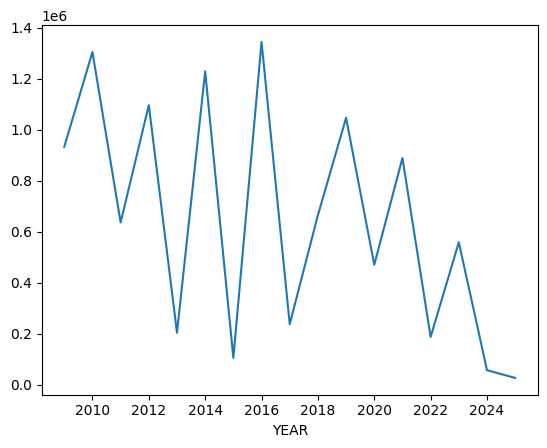

In [77]:
df[df['piles'] == True].groupby('YEAR')['GROSS WEIGHT (KG)'].sum().plot()

### The total number of imports containing 'piles' have decreased since 2006. The total weight of these shipments have also decreased, but are still considerable. They seem to follow a pattern where bigger shipments are made every other year.

## Creating a sub-dataframe for New York area ports

In [78]:
ny = df[df['US PORT'].isin([
    'New York/Newark Area, Newark, New Jersey',
    'Albany, New York',
    'New York, New York'
])]

In [79]:
ny.shape

(285, 59)

<Axes: xlabel='YEAR'>

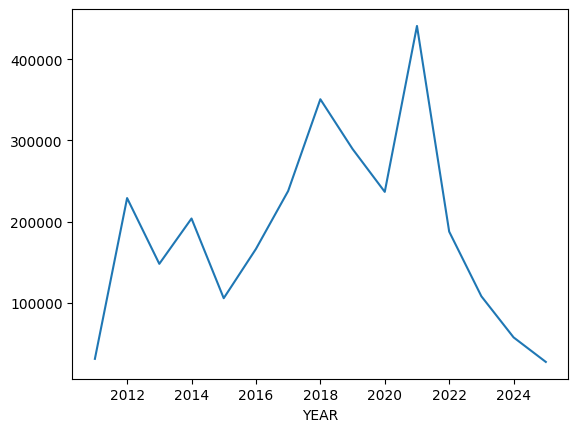

In [80]:
ny[ny['piles'] == True].groupby('YEAR')['GROSS WEIGHT (KG)'].sum().plot()

<Axes: xlabel='YEAR'>

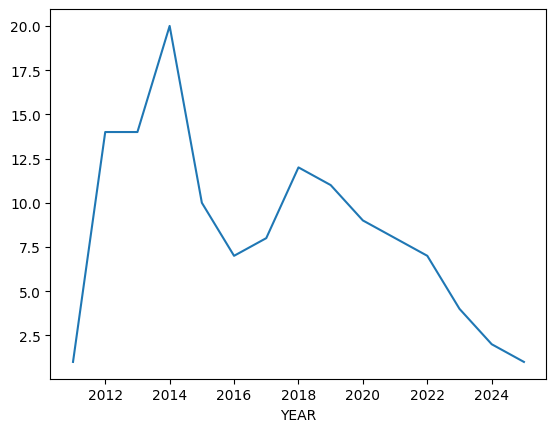

In [81]:
ny[ny['piles'] == True].groupby('YEAR').size().plot()

In [82]:
# Create the pivot table: YEAR as index, species as columns, values = count of True values
species_per_year = ny.groupby('YEAR')[species_cols].sum()

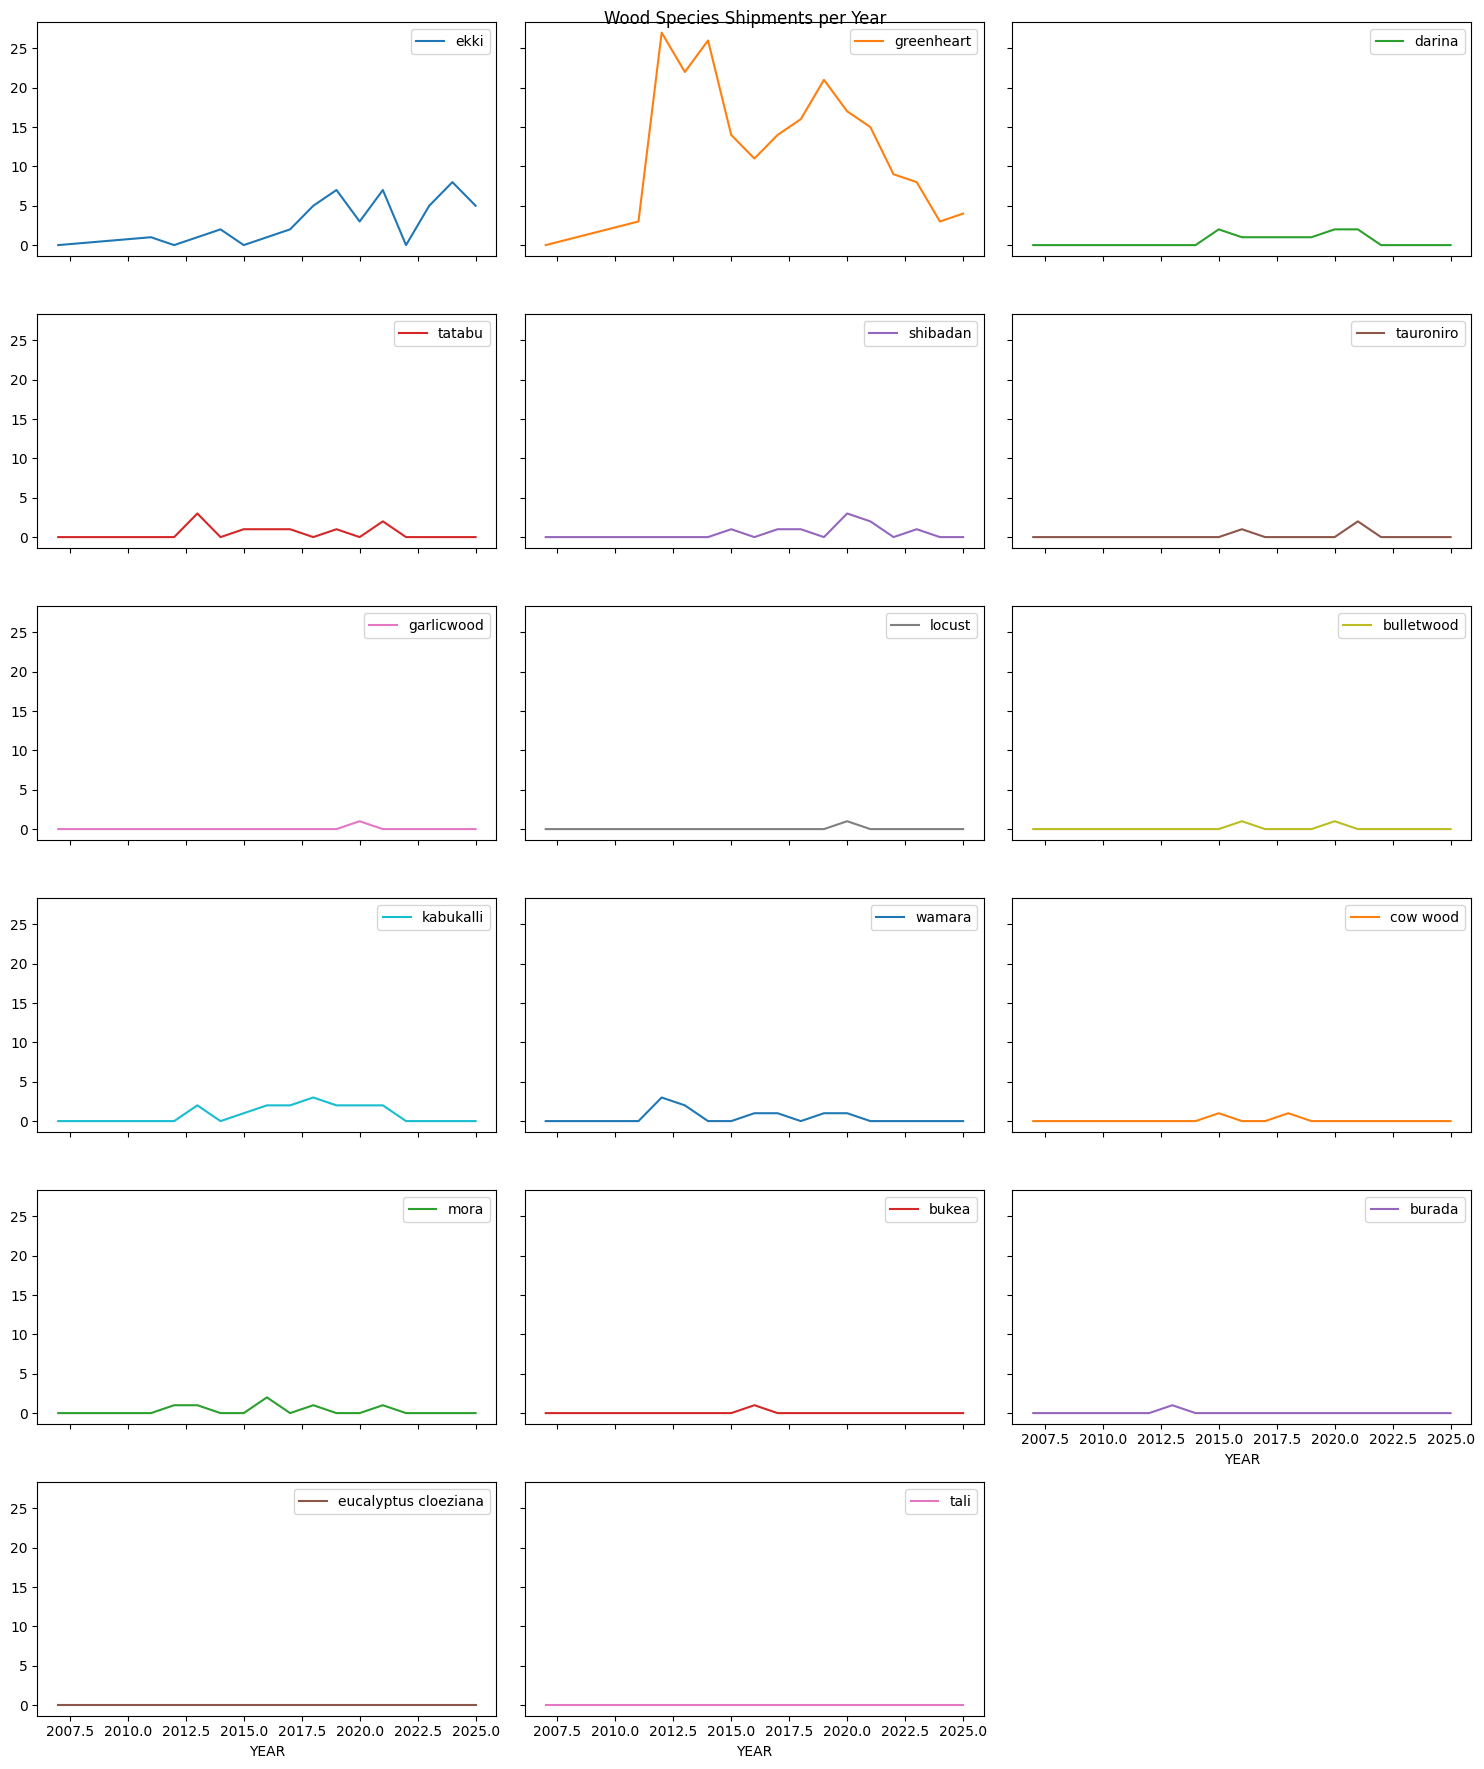

In [83]:
# Create subplots for each species
axes = species_per_year.plot(
    subplots=True,
    layout=(6, 3),  # adjust grid size to fit 17 species (e.g., 6 rows, 3 columns)
    figsize=(15, 18),
    sharex=True,
    sharey=True,
    title='Wood Species Shipments per Year'
)

# Adjust layout and spacing
plt.tight_layout()
plt.show()

### Follow similar trends as the overall data, though ekki here shows a noticeable increase

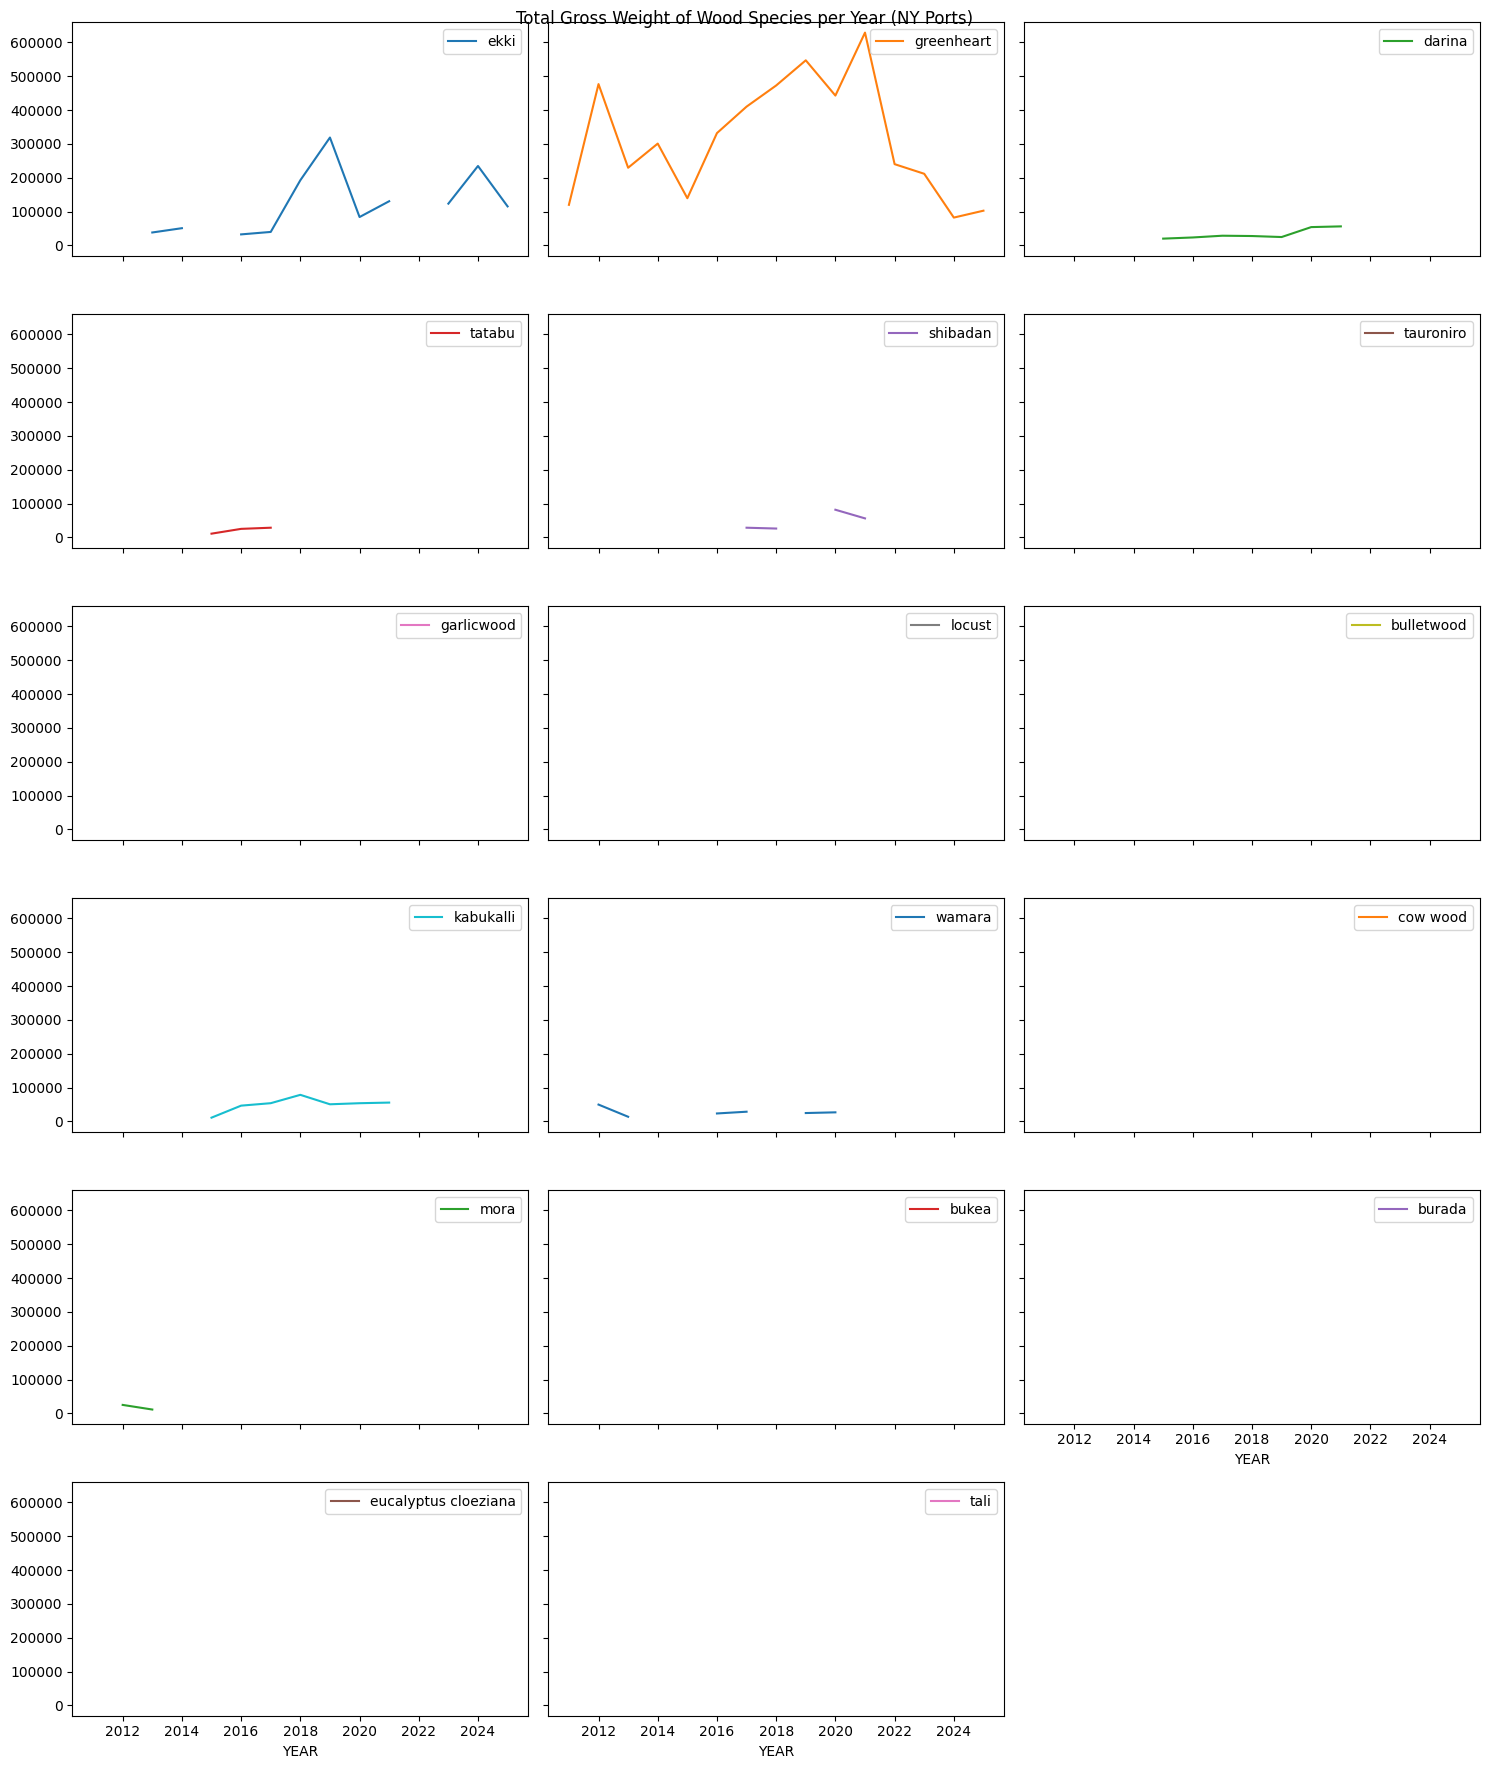

In [84]:
# Dictionary to hold total weights per species per year
species_weight_by_year = {}

# Loop through each species
for species in species_cols:
    species_weight_by_year[species] = ny[ny[species]].groupby('YEAR')['GROSS WEIGHT (KG)'].sum()

# Combine into one DataFrame
weight_per_species = pd.DataFrame(species_weight_by_year)

# Plot each species in a separate subplot
axes = weight_per_species.plot(
    subplots=True,
    layout=(6, 3),  # adjust to fit the number of species
    figsize=(15, 18),
    sharex=True,
    sharey=True,
    title='Total Gross Weight of Wood Species per Year (NY Ports)'
)

plt.tight_layout()
plt.show()

### When looking at weight, it seems the decline in greenheart imports started around 2021

## Shipping countries per year for New York area ports

In [85]:
shipping_countries_per_year = ny.pivot_table(
    index='YEAR',
    columns='SHIPPER_COUNTRY',
    values='SHIPPER_CLEANED',  # any column name works for counting rows
    aggfunc='size',
    fill_value=0
)

In [86]:
shipping_countries_per_year

SHIPPER_COUNTRY,Cameroon,Guyana,Netherlands
YEAR,,,
2007,0,0,1
2011,0,4,1
2012,0,29,0
2013,0,25,1
2014,1,24,1
2015,0,15,0
2016,0,14,1
2017,0,16,2
2018,0,20,6


<Axes: xlabel='YEAR'>

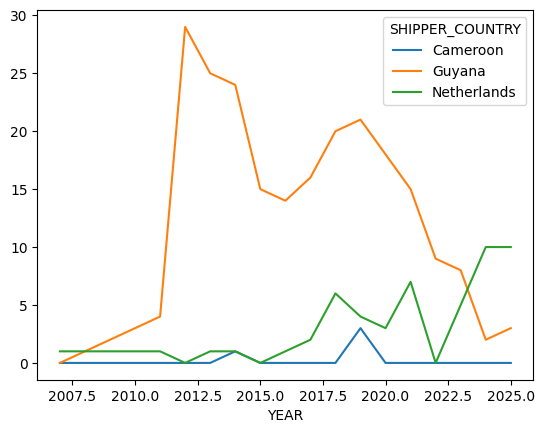

In [87]:
shipping_countries_per_year.plot()

## Similar trends as the overall data, where imports through Netherlands have increased

In [88]:
shipping_countries_per_year = ny.pivot_table(
    index='YEAR',
    columns='SHIPPER_COUNTRY',
    values='GROSS WEIGHT (KG)',  # any column name works for counting rows
    aggfunc='sum',
    fill_value=0
)

In [89]:
shipping_countries_per_year

SHIPPER_COUNTRY,Cameroon,Guyana,Netherlands
YEAR,,,
2007,0,0,86790
2011,0,139416,700
2012,0,511109,0
2013,0,271386,38000
2014,35472,279480,15229
2015,0,150113,0
2016,0,401450,32360
2017,0,463690,39615
2018,0,565330,231832


<Axes: xlabel='YEAR'>

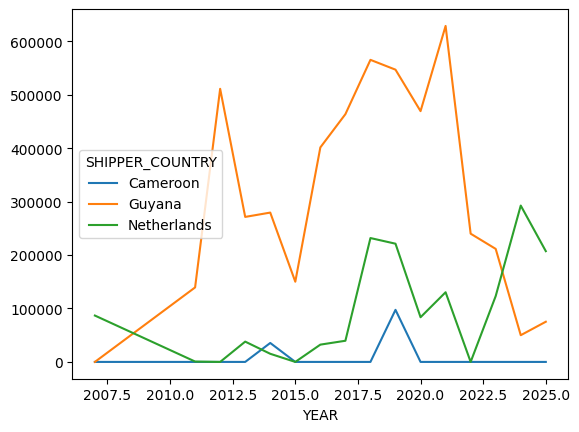

In [90]:
shipping_countries_per_year.plot()

### When we look at weight, it seems the decrease in wood from Guyana started around 2021, and increased from Netherlands in 2022

## Shipping countries per year for New York area ports, for ekki wood

In [91]:
ekki_shipping_countries_per_year = ny[ny['ekki']].pivot_table(
    index='YEAR',
    columns='SHIPPER_COUNTRY',
    values='SHIPPER_CLEANED',  # any column works for counting rows
    aggfunc='size',
    fill_value=0
)

In [92]:
ekki_shipping_countries_per_year

SHIPPER_COUNTRY,Cameroon,Netherlands
YEAR,,
2011,0,1
2013,0,1
2014,1,1
2016,0,1
2017,0,2
2018,0,5
2019,3,4
2020,0,3
2021,0,7


<Axes: xlabel='YEAR'>

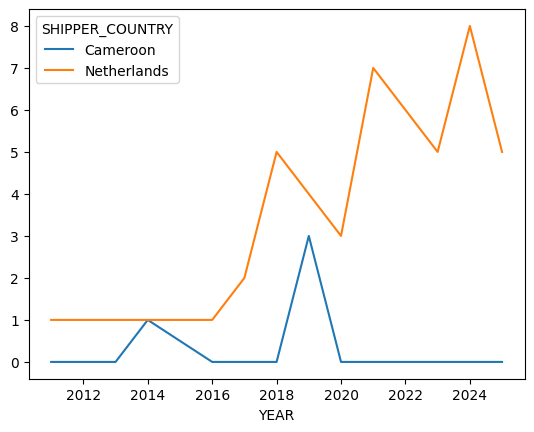

In [93]:
ekki_shipping_countries_per_year.plot()

In [94]:
ekki_shipping_countries_per_year = ny[ny['ekki']].pivot_table(
    index='YEAR',
    columns='SHIPPER_COUNTRY',
    values='GROSS WEIGHT (KG)',  # any column works for counting rows
    aggfunc='sum',
    fill_value=0
)

In [95]:
ekki_shipping_countries_per_year

SHIPPER_COUNTRY,Cameroon,Netherlands
YEAR,,
2011,0,700
2013,0,38000
2014,35472,15229
2016,0,32360
2017,0,39615
2018,0,192420
2019,97465,221244
2020,0,83636
2021,0,130390


<Axes: xlabel='YEAR'>

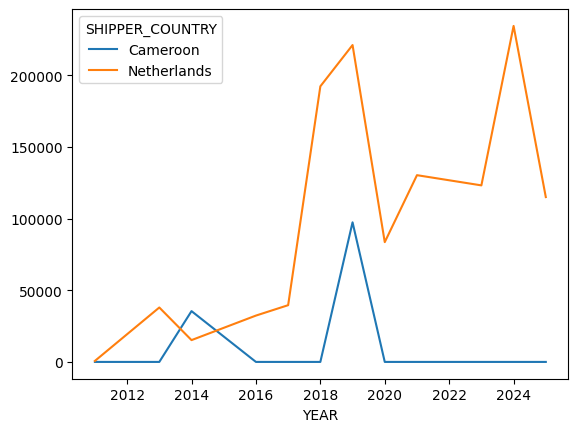

In [96]:
ekki_shipping_countries_per_year.plot()

### Weight of ekki shipped to New York-area ports has increased especially since around 2017, but there are still sporadic shipments from Cameroon directly

## Shipping countries per year for New York area ports, for greenheart wood

In [97]:
greenheart_shipping_countries_per_year = df[df['greenheart']].pivot_table(
    index='YEAR',
    columns='SHIPPER_COUNTRY',
    values='GROSS WEIGHT (KG)',  # any column works for counting rows
    aggfunc='sum',
    fill_value=0
)

In [98]:
greenheart_shipping_countries_per_year

SHIPPER_COUNTRY,Guyana
YEAR,
2009,1194600
2010,1468025
2011,864827
2012,1401701
2013,313273
2014,1335244
2015,139245
2016,1509459
2017,410046


<Axes: xlabel='YEAR'>

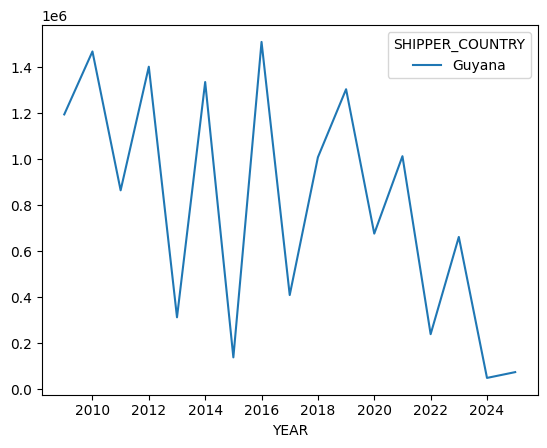

In [99]:
greenheart_shipping_countries_per_year.plot()

### Follows similar trends as the New York overall data 

In [100]:
greenheart_shipping_countries_per_year = df[df['greenheart']].pivot_table(
    index='YEAR',
    columns='SHIPPER_COUNTRY',
    values='SHIPPER_CLEANED',  # any column works for counting rows
    aggfunc='size',
    fill_value=0
)

In [101]:
ny.groupby('SHIPPER_CLEANED')['GROSS WEIGHT (KG)'].mean().reset_index().sort_values(by='GROSS WEIGHT (KG)', ascending=False)

,SHIPPER_CLEANED,GROSS WEIGHT (KG)
4,Getma Cameroun Douala,35472.000000
6,McVantage of Guyana,35100.166667
15,Wijma Kampen B.V.,32585.037037
1,Compagnie Forestière de Kribi SA,32488.333333
7,Not Available,29617.000000
9,Reginald Manbodh T/A Gs Forest,26769.222222
14,Variety Woods & Greenheart,26380.603604
13,Trade-Linc,25393.000000
10,Timber Wood Products,25342.000000
5,Hupkes Wijma B.V.,24926.320000


In [102]:
ny.groupby('SHIPPER_CLEANED')['GROSS WEIGHT (KG)'].median().reset_index().sort_values(by='GROSS WEIGHT (KG)', ascending=False)

,SHIPPER_CLEANED,GROSS WEIGHT (KG)
1,Compagnie Forestière de Kribi SA,38610.0
4,Getma Cameroun Douala,35472.0
7,Not Available,29617.0
9,Reginald Manbodh T/A Gs Forest,27267.0
14,Variety Woods & Greenheart,26075.0
13,Trade-Linc,25393.0
10,Timber Wood Products,25342.0
15,Wijma Kampen B.V.,23580.0
6,McVantage of Guyana,23494.5
0,Barakat Timbers & Trading Co.,23008.0


In [103]:
shipments_per_shipper_ny = ny.pivot_table(
    index='YEAR',
    columns='SHIPPER_CLEANED',
    values='GROSS WEIGHT (KG)',  # any column name is fine for counting rows
    aggfunc='size',
    fill_value=0
)

In [104]:
shipments_per_shipper_ny

SHIPPER_CLEANED,Barakat Timbers & Trading Co.,Compagnie Forestière de Kribi SA,Durable Wood Products Enterprises,GS Forest Resources,Getma Cameroun Douala,Hupkes Wijma B.V.,McVantage of Guyana,Not Available,Rafeek Khan T A Durable Wood Products Enterprises,Reginald Manbodh T/A Gs Forest,Timber Wood Products,Toolsie Persaud Limited/Interior Forest Industrie,Toolsie Persaud Limited/Interior Forest Industries,Trade-Linc,Variety Woods & Greenheart,Wijma Kampen B.V.
YEAR,,,,,,,,,,,,,,,,
2007,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2011,0,0,0,0,0,0,0,0,0,0,2,0,0,0,2,1
2012,0,0,16,1,0,0,0,0,0,0,0,0,0,0,12,0
2013,0,0,12,5,0,0,0,0,0,0,0,2,0,0,8,1
2014,0,0,15,8,1,0,0,0,0,0,0,2,1,0,0,1
2015,0,0,3,4,0,0,0,0,1,0,0,0,0,0,7,0
2016,0,0,1,3,0,0,5,0,0,0,0,0,0,0,5,1
2017,0,0,0,6,0,0,0,0,0,0,0,0,0,0,10,2
2018,0,0,0,8,0,0,0,0,0,0,0,0,0,0,12,6


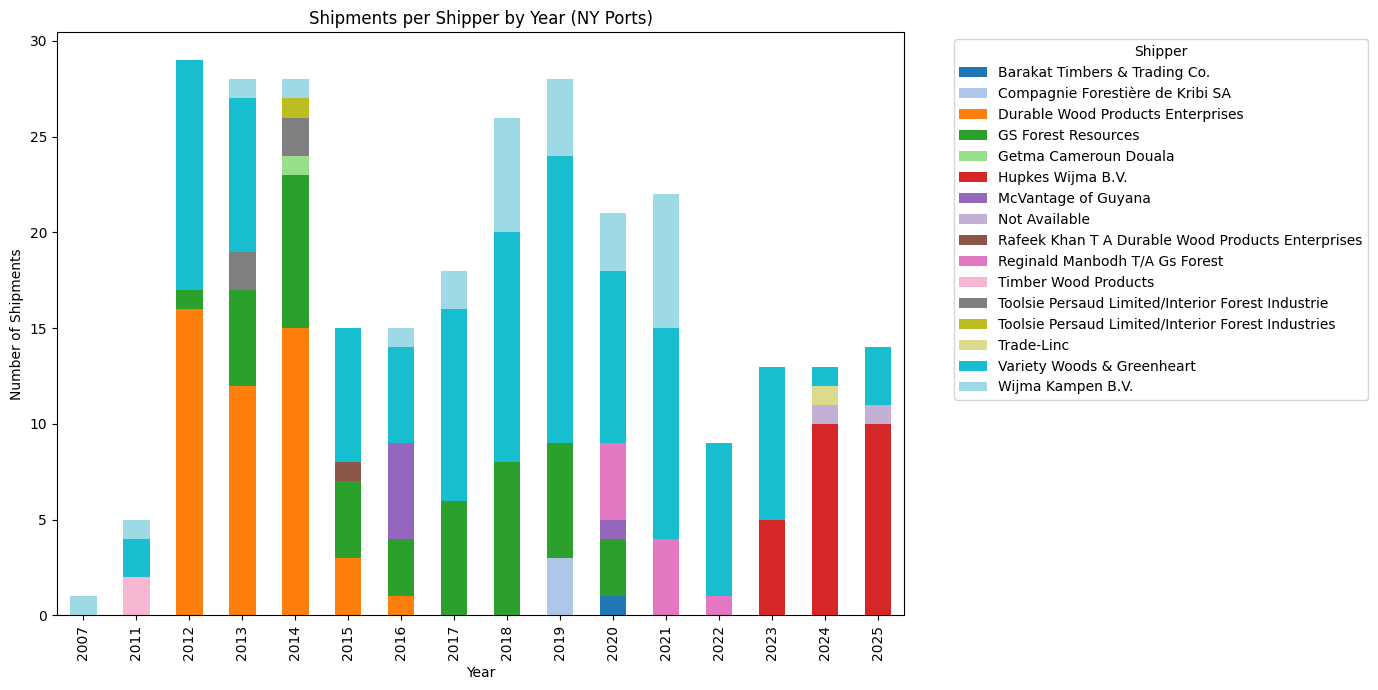

In [105]:
shipments_per_shipper_ny.plot(
    kind='bar',
    stacked=True,
    figsize=(14, 7),
    colormap='tab20'  # optional: use a diverse color palette
)

plt.title('Shipments per Shipper by Year (NY Ports)')
plt.xlabel('Year')
plt.ylabel('Number of Shipments')
plt.legend(title='Shipper', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### It appears that Hupkes Wijma B.V. accounts for the increase in shipments coming from Netherlands in recent years, and Variety Woods & Greenheart used to supply more wood from Guyana, but has decreased (why? and where do the shipments coming through Netherlands originate from?)

In [106]:
shipments_per_shipper_ny_weight = ny.pivot_table(
    index='YEAR',
    columns='SHIPPER_CLEANED',
    values='GROSS WEIGHT (KG)',  # any column name is fine for counting rows
    aggfunc='sum',
    fill_value=0
)

In [107]:
shipments_per_shipper_ny_weight

SHIPPER_CLEANED,Barakat Timbers & Trading Co.,Compagnie Forestière de Kribi SA,Durable Wood Products Enterprises,GS Forest Resources,Getma Cameroun Douala,Hupkes Wijma B.V.,McVantage of Guyana,Not Available,Rafeek Khan T A Durable Wood Products Enterprises,Reginald Manbodh T/A Gs Forest,Timber Wood Products,Toolsie Persaud Limited/Interior Forest Industrie,Toolsie Persaud Limited/Interior Forest Industries,Trade-Linc,Variety Woods & Greenheart,Wijma Kampen B.V.
YEAR,,,,,,,,,,,,,,,,
2007,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,86790
2011,0,0,0,0,0,0,0,0,0,0,50684,0,0,0,88732,700
2012,0,0,255126,18298,0,0,0,0,0,0,0,0,0,0,237685,0
2013,0,0,135750,37850,0,0,0,0,0,0,0,21091,0,0,97786,38000
2014,0,0,202017,66572,35472,0,0,0,0,0,0,21313,10891,0,0,15229
2015,0,0,24655,40981,0,0,0,0,8259,0,0,0,0,0,76218,0
2016,0,0,16515,74386,0,0,193526,0,0,0,0,0,0,0,117023,32360
2017,0,0,0,183362,0,0,0,0,0,0,0,0,0,0,280328,39615
2018,0,0,0,221343,0,0,0,0,0,0,0,0,0,0,343987,231832


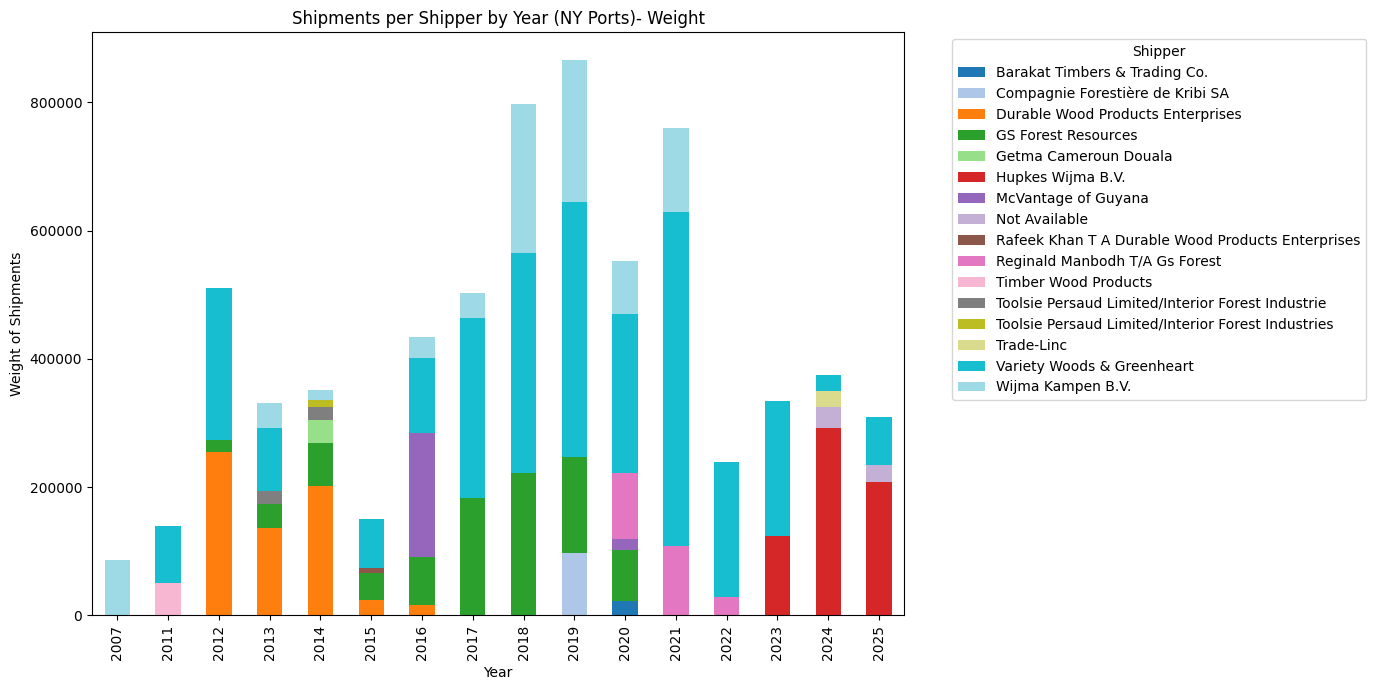

In [108]:
shipments_per_shipper_ny_weight.plot(
    kind='bar',
    stacked=True,
    figsize=(14, 7),
    colormap='tab20'  # optional: use a diverse color palette
)

plt.title('Shipments per Shipper by Year (NY Ports)- Weight')
plt.xlabel('Year')
plt.ylabel('Weight of Shipments')
plt.legend(title='Shipper', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Ekki shipments per shipper - New York ports 

In [109]:
ekki_shipments_per_shipper_ny = ny[ny['ekki']].pivot_table(
    index='YEAR',
    columns='SHIPPER_CLEANED',
    values='GROSS WEIGHT (KG)',  # any column name is fine for counting rows
    aggfunc='size',
    fill_value=0
)

In [110]:
ekki_shipments_per_shipper_ny

SHIPPER_CLEANED,Compagnie Forestière de Kribi SA,Getma Cameroun Douala,Hupkes Wijma B.V.,Wijma Kampen B.V.
YEAR,,,,
2011,0,0,0,1
2013,0,0,0,1
2014,0,1,0,1
2016,0,0,0,1
2017,0,0,0,2
2018,0,0,0,5
2019,3,0,0,4
2020,0,0,0,3
2021,0,0,0,7


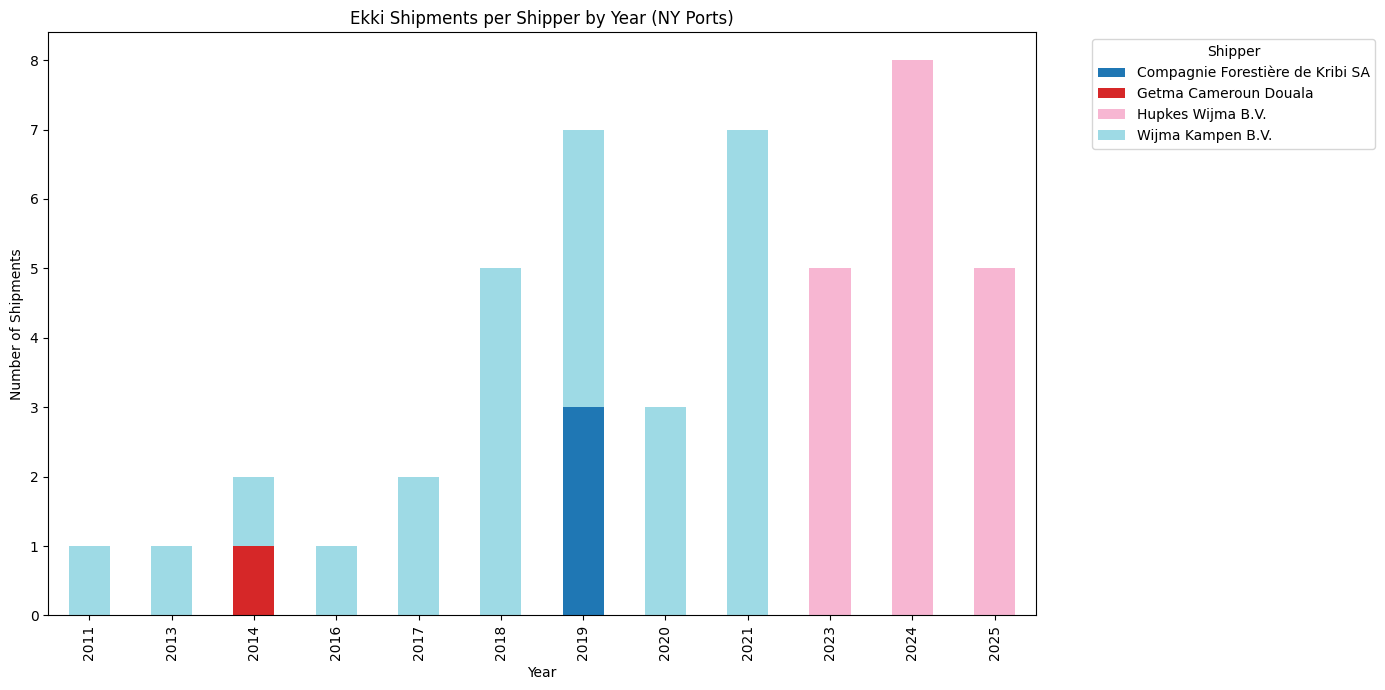

In [111]:
ekki_shipments_per_shipper_ny.plot(
    kind='bar',
    stacked=True,
    figsize=(14, 7),
    colormap='tab20'  # optional: use a diverse color palette
)

plt.title('Ekki Shipments per Shipper by Year (NY Ports)')
plt.xlabel('Year')
plt.ylabel('Number of Shipments')
plt.legend(title='Shipper', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### The company recently switched from importing ekki from Wijma Kampen B.V. to Hupkes Wijma B.V. (The company merged with Hupkes)

In [112]:
ekki_shipments_per_shipper_ny_weight = ny[ny['ekki']].pivot_table(
    index='YEAR',
    columns='SHIPPER_CLEANED',
    values='GROSS WEIGHT (KG)',  # any column name is fine for counting rows
    aggfunc='sum',
    fill_value=0
)

In [113]:
ekki_shipments_per_shipper_ny_weight

SHIPPER_CLEANED,Compagnie Forestière de Kribi SA,Getma Cameroun Douala,Hupkes Wijma B.V.,Wijma Kampen B.V.
YEAR,,,,
2011,0,0,0,700
2013,0,0,0,38000
2014,0,35472,0,15229
2016,0,0,0,32360
2017,0,0,0,39615
2018,0,0,0,192420
2019,97465,0,0,221244
2020,0,0,0,83636
2021,0,0,0,130390


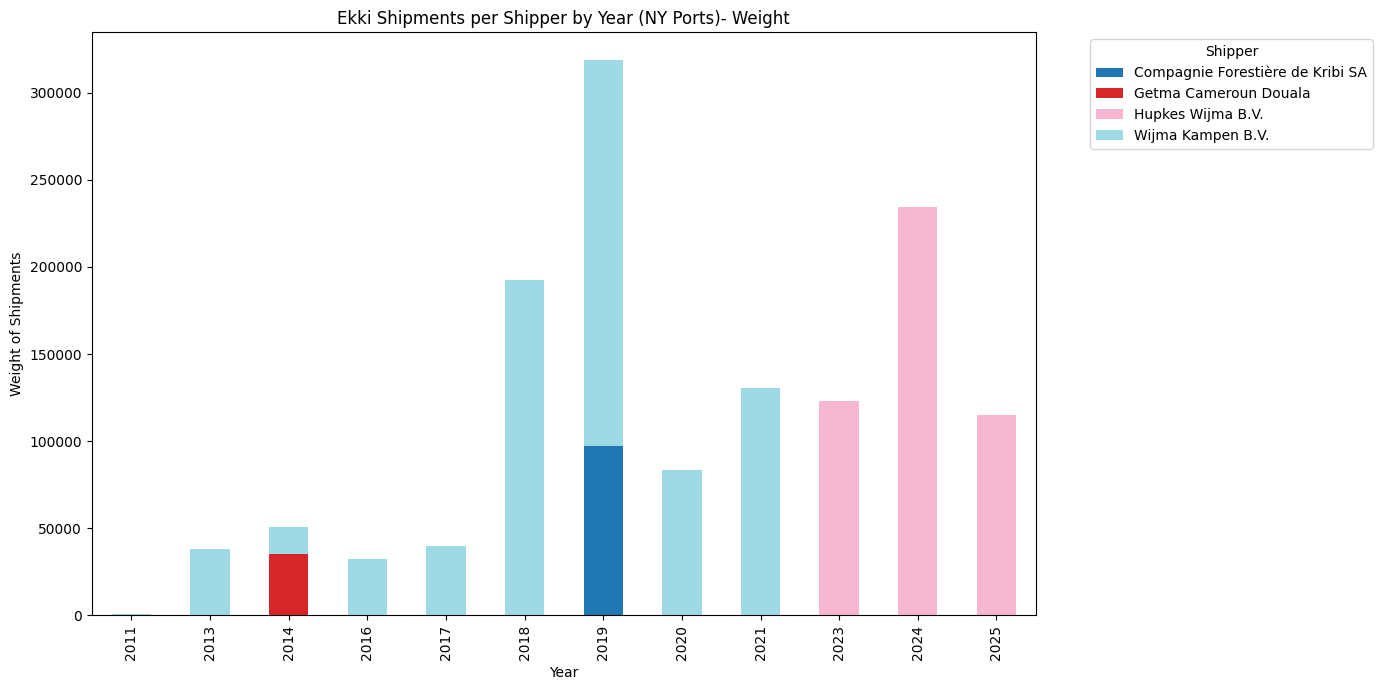

In [114]:
ekki_shipments_per_shipper_ny_weight.plot(
    kind='bar',
    stacked=True,
    figsize=(14, 7),
    colormap='tab20'  # optional: use a diverse color palette
)

plt.title('Ekki Shipments per Shipper by Year (NY Ports)- Weight')
plt.xlabel('Year')
plt.ylabel('Weight of Shipments')
plt.legend(title='Shipper', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### The weight of shipments was highest in 2019 (what were these shipments used for?)

## Greenheart shipments per shipper - New York ports

In [115]:
greenheart_shipments_per_shipper_ny = ny[ny['greenheart']].pivot_table(
    index='YEAR',
    columns='SHIPPER_CLEANED',
    values='GROSS WEIGHT (KG)',  # any column name is fine for counting rows
    aggfunc='size',
    fill_value=0
)

In [116]:
greenheart_shipments_per_shipper_ny

SHIPPER_CLEANED,Barakat Timbers & Trading Co.,Durable Wood Products Enterprises,GS Forest Resources,McVantage of Guyana,Not Available,Rafeek Khan T A Durable Wood Products Enterprises,Reginald Manbodh T/A Gs Forest,Timber Wood Products,Toolsie Persaud Limited/Interior Forest Industrie,Toolsie Persaud Limited/Interior Forest Industries,Trade-Linc,Variety Woods & Greenheart
YEAR,,,,,,,,,,,,
2011,0,0,0,0,0,0,0,1,0,0,0,2
2012,0,14,1,0,0,0,0,0,0,0,0,12
2013,0,10,5,0,0,0,0,0,2,0,0,5
2014,0,15,8,0,0,0,0,0,2,1,0,0
2015,0,3,4,0,0,1,0,0,0,0,0,6
2016,0,1,3,3,0,0,0,0,0,0,0,4
2017,0,0,6,0,0,0,0,0,0,0,0,8
2018,0,0,6,0,0,0,0,0,0,0,0,10
2019,0,0,6,0,0,0,0,0,0,0,0,15


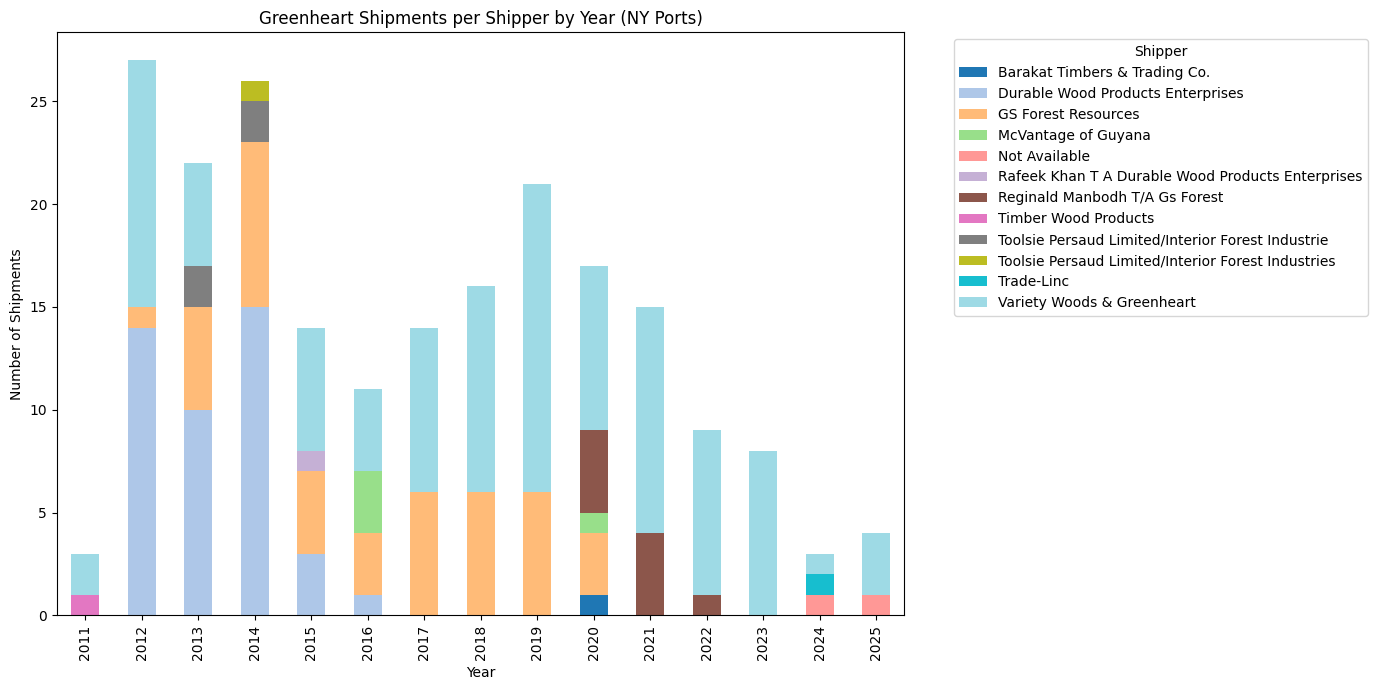

In [117]:
greenheart_shipments_per_shipper_ny.plot(
    kind='bar',
    stacked=True,
    figsize=(14, 7),
    colormap='tab20'  # optional: use a diverse color palette
)

plt.title('Greenheart Shipments per Shipper by Year (NY Ports)')
plt.xlabel('Year')
plt.ylabel('Number of Shipments')
plt.legend(title='Shipper', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### The company still imports greenheart to New York ports from Variety Woods & Greenheart, but has decreased over the years, and dropped a number of other suppliers (why?) A new supplier is Trade-Linc in 2024, and two whose names are not listed on ImportGenius

In [118]:
greenheart_shipments_per_shipper_ny_weight = ny[ny['greenheart']].pivot_table(
    index='YEAR',
    columns='SHIPPER_CLEANED',
    values='GROSS WEIGHT (KG)',  # any column name is fine for counting rows
    aggfunc='sum',
    fill_value=0
)

In [119]:
greenheart_shipments_per_shipper_ny_weight

SHIPPER_CLEANED,Barakat Timbers & Trading Co.,Durable Wood Products Enterprises,GS Forest Resources,McVantage of Guyana,Not Available,Rafeek Khan T A Durable Wood Products Enterprises,Reginald Manbodh T/A Gs Forest,Timber Wood Products,Toolsie Persaud Limited/Interior Forest Industrie,Toolsie Persaud Limited/Interior Forest Industries,Trade-Linc,Variety Woods & Greenheart
YEAR,,,,,,,,,,,,
2011,0,0,0,0,0,0,0,30980,0,0,0,88732
2012,0,220669,18298,0,0,0,0,0,0,0,0,237685
2013,0,122218,37850,0,0,0,0,0,21091,0,0,48236
2014,0,202017,66572,0,0,0,0,0,21313,10891,0,0
2015,0,24655,40981,0,0,8259,0,0,0,0,0,65350
2016,0,16515,74386,148902,0,0,0,0,0,0,0,91981
2017,0,0,183362,0,0,0,0,0,0,0,0,226684
2018,0,0,181610,0,0,0,0,0,0,0,0,290957
2019,0,0,150204,0,0,0,0,0,0,0,0,396748


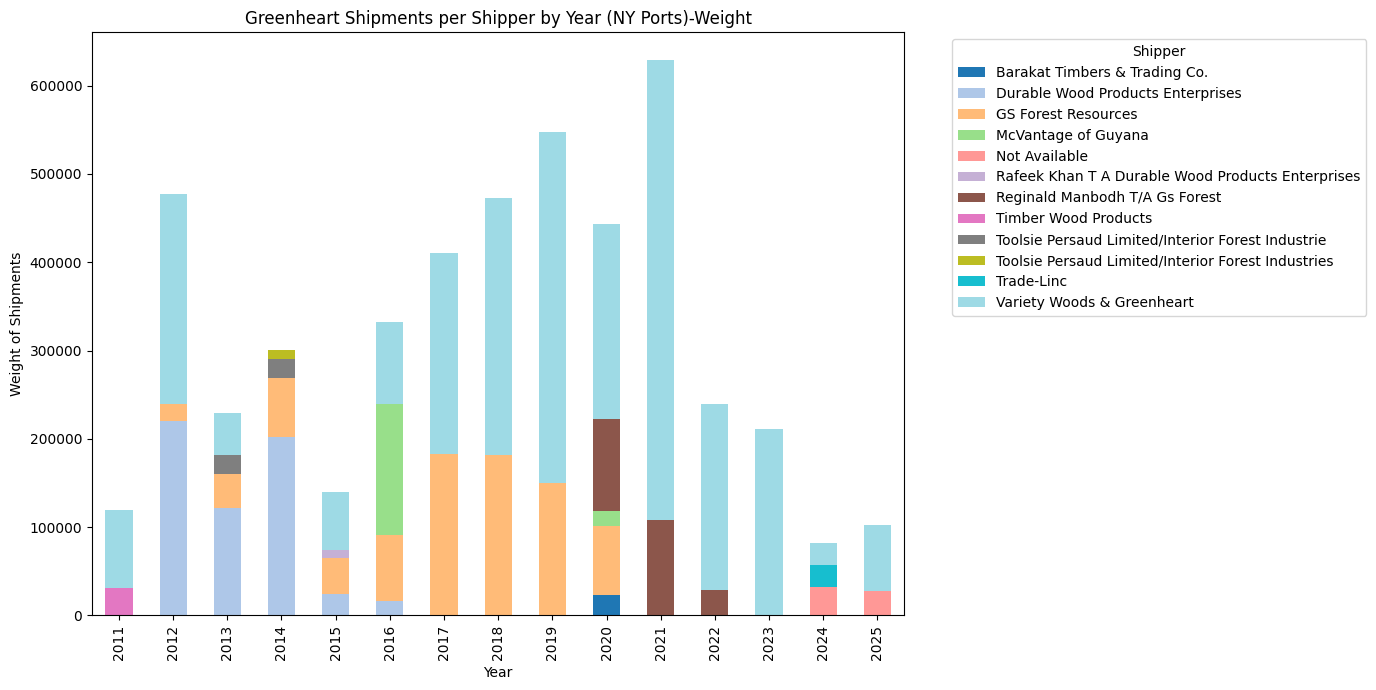

In [120]:
greenheart_shipments_per_shipper_ny_weight.plot(
    kind='bar',
    stacked=True,
    figsize=(14, 7),
    colormap='tab20'  # optional: use a diverse color palette
)

plt.title('Greenheart Shipments per Shipper by Year (NY Ports)-Weight')
plt.xlabel('Year')
plt.ylabel('Weight of Shipments')
plt.legend(title='Shipper', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()